In [ ]:
# Cargar e instalar librerias
!pip install missingno
!pip install spacy
!python -m spacy download es_core_news_sm

import re #Expresiones regulares
import pandas as pd
import numpy as np
import os # Manejo de ubicaciones
import missingno as msno #Identificar valores faltantes
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import joblib
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
!pip install pycaret
!pip install --upgrade scipy
!pip install --upgrade numpy scikit-learn
!pip install --upgrade imbalanced-learn pycaret
import imblearn

2023-10-27 08:22:30.421041: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 08:22:30.421172: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 08:22:30.421332: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 08:22:30.455827: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 08:22:32.546610: W tensorflow/compiler/

  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installe

In [ ]:
#Conocer ubicación de la carpeta
os.getcwd()

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cambiar a una nueva ubicación
nueva_ubicacion = '/content/drive/MyDrive/Tesis_x_Fin/BBDD Tesis'
os.chdir(nueva_ubicacion)

In [ ]:
# Carga de datos
fetal2020 = pd.read_csv('/content/drive/MyDrive/Tesis_x_Fin/BBDD Tesis/fetal2020.csv', encoding='latin1')
fetal2021 = pd.read_csv('/content/drive/MyDrive/Tesis_x_Fin/BBDD Tesis/fetal2021.csv', encoding='latin1')
nac2020 = pd.read_csv('/content/drive/MyDrive/Tesis_x_Fin/BBDD Tesis/nac2020.csv', encoding='latin1')
nac2021 = pd.read_csv('/content/drive/MyDrive/Tesis_x_Fin/BBDD Tesis/nac2021.csv', encoding='latin1')
nofetal2020 = pd.read_csv('/content/drive/MyDrive/Tesis_x_Fin/BBDD Tesis/nofetal2020.csv', encoding='latin1')
nofetal2021 = pd.read_csv('/content/drive/MyDrive/Tesis_x_Fin/BBDD Tesis/nofetal2021.csv', encoding='latin1')
Fallecidos_covid_19 = pd.read_csv('Fallecidos_COVID-19_en_Colombia.csv')

<ipython-input-5-c6a668c00d13>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  fetal2020 = pd.read_csv('/content/drive/MyDrive/Tesis_x_Fin/BBDD Tesis/fetal2020.csv', encoding='latin1')


In [ ]:
# Unir las bases de datos
data_para_modelar_fetal = pd.concat([fetal2020, fetal2021])

In [ ]:
# Conservar solo las columnas deseadas en el DataFrame principal
data_para_modelar_fetal_final = data_para_modelar_fetal[['ANO', 'MES', 'A_DEFUN','COD_MUNIC', 'COD_DPTO', 'SEXO', 'SEG_SOCIAL', 'PESO_NAC','T_GES','T_PARTO','EDAD_MADRE','EST_CIVM','NIV_EDUM','ULTCURMAD','N_HIJOSV','IDADMISALUD']]

# Agregar una nueva columna llamada 'VIVEOMUERE' con valores de 0
data_para_modelar_fetal_final['VIVEOMUERE'] = 0

# Agregar una nueva columna llamada 'IDPERTET' con valores de 9, por que no tenemos información
data_para_modelar_fetal_final['IDPERTET'] = 9

# Agregar una nueva columna llamada 'GRU_ED1' con valores de 30, por que no nacio
data_para_modelar_fetal_final['GRU_ED1'] = 30

<ipython-input-7-ff38e170392d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_para_modelar_fetal_final['VIVEOMUERE'] = 0
<ipython-input-7-ff38e170392d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_para_modelar_fetal_final['IDPERTET'] = 9
<ipython-input-7-ff38e170392d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
print(data_para_modelar_fetal_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64036 entries, 0 to 30708
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANO          64036 non-null  int64  
 1   MES          64036 non-null  int64  
 2   A_DEFUN      64036 non-null  int64  
 3   COD_MUNIC    64036 non-null  int64  
 4   COD_DPTO     64036 non-null  int64  
 5   SEXO         64036 non-null  int64  
 6   SEG_SOCIAL   64036 non-null  int64  
 7   PESO_NAC     64036 non-null  int64  
 8   T_GES        64036 non-null  int64  
 9   T_PARTO      64036 non-null  int64  
 10  EDAD_MADRE   64036 non-null  int64  
 11  EST_CIVM     64036 non-null  int64  
 12  NIV_EDUM     64036 non-null  int64  
 13  ULTCURMAD    64036 non-null  int64  
 14  N_HIJOSV     64036 non-null  int64  
 15  IDADMISALUD  55663 non-null  float64
 16  VIVEOMUERE   64036 non-null  int64  
 17  IDPERTET     64036 non-null  int64  
 18  GRU_ED1      64036 non-null  int64  
dtypes: f

In [ ]:
# Unir las bases de datos
data_para_modelar_nofetal = pd.concat([nofetal2020, nofetal2021])

In [ ]:
# Filtrar por la edad de interes
filtro = (data_para_modelar_nofetal['GRU_ED1'] >= 0) & (data_para_modelar_nofetal['GRU_ED1'] <= 5 )
data_para_modelar_nofetal_final = data_para_modelar_nofetal[filtro]


In [ ]:
data_para_modelar_nofetal_final

,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,...,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL,T_GES_AGRU_CIE
50,41,1,1,1,NaN,2,2020,11,18.0,40.0,...,NaN,NaN,NaN,1,R688/N19/A099,A099,101,1,1,NaN
145,76,1,1,1,NaN,2,2020,12,18.0,8.0,...,NaN,NaN,NaN,1,P369/P77/P369/P072*P220,P77,406,1,85,NaN
176,50,1,1,1,NaN,2,2020,12,10.0,0.0,...,NaN,NaN,NaN,1,P369/P027/P072,P027,402,1,80,NaN
186,11,1,1,1,NaN,2,2020,11,23.0,46.0,...,NaN,NaN,NaN,1,R570/Q242,Q242,613,1,87,NaN
201,76,1,1,1,NaN,2,2020,11,2.0,40.0,...,NaN,NaN,NaN,1,P220/P072/P011/P000*P700 P744,P000,401,1,79,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362894,50,1,1,1,NaN,2,2021,7,0.0,10.0,...,1.0,NaN,NaN,1,P529/P369/P072,P529,406,1,83,2.0
362925,5,1,1,1,NaN,2,2021,7,4.0,5.0,...,NaN,NaN,NaN,1,P614/P071/P914/P362*Q250,Q250,613,1,87,2.0
362926,11,1,1,1,NaN,2,2021,5,9.0,35.0,...,NaN,NaN,NaN,1,P369/P369/P072,P369,405,1,84,2.0
362928,66,572,3,5,NaN,2,2021,11,14.0,0.0,...,NaN,1.0,NaN,2,G931/P249/G402,G402,604,1,46,9.0


In [ ]:
# Conservar solo las columnas deseadas en el DataFrame principal
data_para_modelar_nofetal_final = data_para_modelar_nofetal_final[['ANO', 'MES', 'A_DEFUN', 'COD_DPTO', 'GRU_ED1' , 'COD_MUNIC', 'SEXO', 'SEG_SOCIAL', 'PESO_NAC','T_GES','T_PARTO','EDAD_MADRE','EST_CIVM','NIV_EDUM','ULTCURMAD','N_HIJOSV','IDADMISALUD', 'IDPERTET']]


# Agregar una nueva columna llamada 'VIVEOMUERE' con valores de 0, 0=fallece
data_para_modelar_nofetal_final['VIVEOMUERE'] = 0

<ipython-input-12-0581120f37da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_para_modelar_nofetal_final['VIVEOMUERE'] = 0


In [ ]:
print(data_para_modelar_nofetal_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11924 entries, 50 to 362929
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANO          11924 non-null  int64  
 1   MES          11924 non-null  int64  
 2   A_DEFUN      11924 non-null  int64  
 3   COD_DPTO     11924 non-null  int64  
 4   GRU_ED1      11924 non-null  int64  
 5   COD_MUNIC    11924 non-null  int64  
 6   SEXO         11924 non-null  int64  
 7   SEG_SOCIAL   11924 non-null  int64  
 8   PESO_NAC     11923 non-null  float64
 9   T_GES        11922 non-null  float64
 10  T_PARTO      11923 non-null  float64
 11  EDAD_MADRE   11923 non-null  float64
 12  EST_CIVM     11923 non-null  float64
 13  NIV_EDUM     11923 non-null  float64
 14  ULTCURMAD    11923 non-null  float64
 15  N_HIJOSV     11923 non-null  float64
 16  IDADMISALUD  11089 non-null  float64
 17  IDPERTET     11924 non-null  int64  
 18  VIVEOMUERE   11924 non-null  int64  
dtypes:

In [ ]:
# Extrae las columnas relevantes de la base de datos original y la base COVID-19
columnas_relevantes = ['COD_DPTO', 'GRU_ED1', 'SEXO', 'IDPERTET', 'VIVEOMUERE']

# Filtra la base de datos original para obtener solo las filas que coinciden con la base COVID-19
df_muertes_covid = data_para_modelar_nofetal_final[data_para_modelar_nofetal_final[columnas_relevantes].isin(Fallecidos_covid_19[columnas_relevantes].to_dict('list')).all(axis=1)]

# Crea una nueva columna "muerte por COVID-19" en la base de datos original e inicialízala con 0
data_para_modelar_nofetal_final['muerte por COVID-19'] = 0

# Marca las 34 filas correspondientes a las muertes por COVID-19 con 1
data_para_modelar_nofetal_final.loc[df_muertes_covid.head(33).index, 'muerte por COVID-19'] = 1


<ipython-input-14-8ad2ecbd0781>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_para_modelar_nofetal_final['muerte por COVID-19'] = 0


In [ ]:
print(data_para_modelar_nofetal_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11924 entries, 50 to 362929
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ANO                  11924 non-null  int64  
 1   MES                  11924 non-null  int64  
 2   A_DEFUN              11924 non-null  int64  
 3   COD_DPTO             11924 non-null  int64  
 4   GRU_ED1              11924 non-null  int64  
 5   COD_MUNIC            11924 non-null  int64  
 6   SEXO                 11924 non-null  int64  
 7   SEG_SOCIAL           11924 non-null  int64  
 8   PESO_NAC             11923 non-null  float64
 9   T_GES                11922 non-null  float64
 10  T_PARTO              11923 non-null  float64
 11  EDAD_MADRE           11923 non-null  float64
 12  EST_CIVM             11923 non-null  float64
 13  NIV_EDUM             11923 non-null  float64
 14  ULTCURMAD            11923 non-null  float64
 15  N_HIJOSV             11923 non-nul

In [ ]:
data_para_modelar_nofetal_final

,ANO,MES,A_DEFUN,COD_DPTO,GRU_ED1,COD_MUNIC,SEXO,SEG_SOCIAL,PESO_NAC,T_GES,T_PARTO,EDAD_MADRE,EST_CIVM,NIV_EDUM,ULTCURMAD,N_HIJOSV,IDADMISALUD,IDPERTET,VIVEOMUERE,muerte por COVID-19
50,2020,11,1,41,5,1,2,2,2.0,3.0,1.0,3.0,1.0,4.0,10.0,2.0,2.0,6,0,0
145,2020,12,1,76,3,1,1,1,1.0,2.0,2.0,5.0,5.0,7.0,2.0,1.0,1.0,5,0,0
176,2020,12,1,50,3,1,2,2,1.0,2.0,1.0,3.0,5.0,2.0,5.0,3.0,2.0,6,0,1
186,2020,11,1,11,5,1,1,1,6.0,3.0,2.0,6.0,1.0,9.0,5.0,1.0,1.0,6,0,1
201,2020,11,1,76,3,1,2,1,1.0,2.0,2.0,4.0,9.0,99.0,99.0,1.0,1.0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362894,2021,7,1,50,2,1,2,1,1.0,2.0,2.0,4.0,9.0,13.0,0.0,2.0,1.0,6,0,0
362925,2021,7,1,5,3,1,2,2,2.0,2.0,1.0,2.0,5.0,4.0,10.0,3.0,2.0,6,0,0
362926,2021,5,1,11,1,1,2,1,1.0,2.0,2.0,5.0,5.0,4.0,11.0,1.0,1.0,6,0,0
362928,2021,11,3,66,5,572,2,2,6.0,9.0,1.0,5.0,6.0,4.0,11.0,5.0,2.0,1,0,0


In [ ]:
# Utiliza value_counts() para contar los valores únicos y su frecuencia en la nueva variable
conteo_muertes_covid = data_para_modelar_nofetal_final['muerte por COVID-19'].value_counts()

# Muestra los resultados
print(conteo_muertes_covid)

0    11891
1       33
Name: muerte por COVID-19, dtype: int64


In [ ]:
# Unir las bases de datos
combined_nac_data = pd.concat([nac2020, nac2021])

In [ ]:
# Conservar solo las columnas deseadas en el DataFrame principal
data_para_modelar_nac_final = combined_nac_data[['ANO', 'MES', 'AREANAC', 'COD_DPTO', 'COD_MUNIC', 'SEXO', 'SEG_SOCIAL', 'PESO_NAC','T_GES','TIPO_PARTO','EDAD_MADRE','EST_CIVM','NIV_EDUM','ULTCURMAD','N_HIJOSV','IDCLASADMI', 'IDPERTET']]

# Agregar una nueva columna llamada 'VIVEOMUERE' con valores de 1 por que vive
data_para_modelar_nac_final['VIVEOMUERE'] = 1

# Agregar una nueva columna llamada 'gru_ed1' con valores de 0, por que no nacio
data_para_modelar_nac_final['GRU_ED1'] = 0

<ipython-input-19-c804ce82504c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_para_modelar_nac_final['VIVEOMUERE'] = 1
<ipython-input-19-c804ce82504c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_para_modelar_nac_final['GRU_ED1'] = 0


In [ ]:
data_para_modelos_machine = pd.concat([data_para_modelar_fetal_final, data_para_modelar_nofetal_final, data_para_modelar_nac_final])

In [ ]:
# Verificar información sobre las columnas, tipos de datos, valores faltantes, etc.
print(data_para_modelos_machine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322276 entries, 0 to 616913
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ANO                  1322276 non-null  int64  
 1   MES                  1322276 non-null  int64  
 2   A_DEFUN              75960 non-null    float64
 3   COD_MUNIC            1322276 non-null  int64  
 4   COD_DPTO             1322276 non-null  int64  
 5   SEXO                 1322276 non-null  int64  
 6   SEG_SOCIAL           1322276 non-null  int64  
 7   PESO_NAC             1322275 non-null  float64
 8   T_GES                1322274 non-null  float64
 9   T_PARTO              75959 non-null    float64
 10  EDAD_MADRE           1322275 non-null  float64
 11  EST_CIVM             1322275 non-null  float64
 12  NIV_EDUM             1322275 non-null  float64
 13  ULTCURMAD            1322275 non-null  float64
 14  N_HIJOSV             1322275 non-null  float64
 15 

In [ ]:
# Combinar las columnas IDADMISALUD e IDCLASADMI en una sola columna sin nulos
data_para_modelos_machine['IDADMINSALUD'] = data_para_modelos_machine['IDADMISALUD'].fillna(data_para_modelos_machine['IDCLASADMI']).astype(str)

data_para_modelos_machine['TIP_PARTO'] = data_para_modelos_machine['TIPO_PARTO'].fillna(data_para_modelos_machine['T_PARTO']).astype(str)

# Eliminar las columnas originales
data_para_modelos_machine.drop(['IDADMISALUD', 'IDCLASADMI', 'T_PARTO', 'TIPO_PARTO'], axis=1, inplace=True)

# Ver el DataFrame resultante
print(data_para_modelos_machine)

         ANO  MES  A_DEFUN  COD_MUNIC  COD_DPTO  SEXO  SEG_SOCIAL  PESO_NAC  \
0       2020    5      1.0          1        70     3           2       9.0   
1       2020    5      1.0          1        11     3           1       1.0   
2       2020    5      1.0          1        11     1           5       1.0   
3       2020    5      1.0          1        11     3           5       1.0   
4       2020    5      1.0          1        11     2           5       3.0   
...      ...  ...      ...        ...       ...   ...         ...       ...   
616909  2021   11      NaN        450        27     2           2       9.0   
616910  2021   11      NaN        615        27     2           2       9.0   
616911  2021   11      NaN         77        27     1           2       5.0   
616912  2021    7      NaN         77        27     2           2       5.0   
616913  2021    4      NaN        430        27     1           2       6.0   

        T_GES  EDAD_MADRE  ...  NIV_EDUM  ULTCURMAD

In [ ]:
# Verificar información sobre las columnas, tipos de datos, valores faltantes, etc.
print(data_para_modelos_machine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322276 entries, 0 to 616913
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ANO                  1322276 non-null  int64  
 1   MES                  1322276 non-null  int64  
 2   A_DEFUN              75960 non-null    float64
 3   COD_MUNIC            1322276 non-null  int64  
 4   COD_DPTO             1322276 non-null  int64  
 5   SEXO                 1322276 non-null  int64  
 6   SEG_SOCIAL           1322276 non-null  int64  
 7   PESO_NAC             1322275 non-null  float64
 8   T_GES                1322274 non-null  float64
 9   EDAD_MADRE           1322275 non-null  float64
 10  EST_CIVM             1322275 non-null  float64
 11  NIV_EDUM             1322275 non-null  float64
 12  ULTCURMAD            1322275 non-null  float64
 13  N_HIJOSV             1322275 non-null  float64
 14  VIVEOMUERE           1322276 non-null  int64  
 15 

In [ ]:
# Convertir las columnas IDADMINSALUD y TIP_PARTO de tipo object a tipo float
data_para_modelos_machine['IDADMINSALUD'] = data_para_modelos_machine['IDADMINSALUD'].astype(float)
data_para_modelos_machine['TIP_PARTO'] = data_para_modelos_machine['TIP_PARTO'].astype(float)

In [ ]:
# Verificar información sobre las columnas, tipos de datos, valores faltantes, etc.
print(data_para_modelos_machine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322276 entries, 0 to 616913
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ANO                  1322276 non-null  int64  
 1   MES                  1322276 non-null  int64  
 2   A_DEFUN              75960 non-null    float64
 3   COD_MUNIC            1322276 non-null  int64  
 4   COD_DPTO             1322276 non-null  int64  
 5   SEXO                 1322276 non-null  int64  
 6   SEG_SOCIAL           1322276 non-null  int64  
 7   PESO_NAC             1322275 non-null  float64
 8   T_GES                1322274 non-null  float64
 9   EDAD_MADRE           1322275 non-null  float64
 10  EST_CIVM             1322275 non-null  float64
 11  NIV_EDUM             1322275 non-null  float64
 12  ULTCURMAD            1322275 non-null  float64
 13  N_HIJOSV             1322275 non-null  float64
 14  VIVEOMUERE           1322276 non-null  int64  
 15 

In [ ]:
# Verificar datos nulos en el DataFrame
nulos_por_columna = data_para_modelos_machine.isnull().sum()
print(nulos_por_columna)
# Estos datos nulos hacen parte de la base de datos de no fetales del 2020 y 2021

ANO                          0
MES                          0
A_DEFUN                1246316
COD_MUNIC                    0
COD_DPTO                     0
SEXO                         0
SEG_SOCIAL                   0
PESO_NAC                     1
T_GES                        2
EDAD_MADRE                   1
EST_CIVM                     1
NIV_EDUM                     1
ULTCURMAD                    1
N_HIJOSV                     1
VIVEOMUERE                   0
IDPERTET                     0
GRU_ED1                      0
muerte por COVID-19    1310352
AREANAC                  75960
IDADMINSALUD            147050
TIP_PARTO                    1
dtype: int64


In [ ]:
# Filtrar los registros que contienen datos nulos y mostrar los primeros 20
registros_con_nulos = data_para_modelos_machine[data_para_modelos_machine.isnull().any(axis=1)]
primeros_20_registros_con_nulos = registros_con_nulos.head(20)

print(primeros_20_registros_con_nulos)


     ANO  MES  A_DEFUN  COD_MUNIC  COD_DPTO  SEXO  SEG_SOCIAL  PESO_NAC  \
0   2020    5      1.0          1        70     3           2       9.0   
1   2020    5      1.0          1        11     3           1       1.0   
2   2020    5      1.0          1        11     1           5       1.0   
3   2020    5      1.0          1        11     3           5       1.0   
4   2020    5      1.0          1        11     2           5       3.0   
5   2020    5      1.0          1        11     3           2       1.0   
6   2020    5      1.0          1        11     2           2       1.0   
7   2020    5      1.0          1        23     3           2       7.0   
8   2020    5      1.0        176        15     3           2       1.0   
9   2020    5      1.0        176        15     3           2       1.0   
10  2020    5      1.0          1        88     3           1       1.0   
11  2020    5      2.0        100        19     1           3       1.0   
12  2020    5      1.0   

In [ ]:
# Filtrar los registros que contienen datos nulos en las columnas especificadas y mostrar los primeros 20
columnas_con_nulos = ['PESO_NAC', 'T_GES', 'EDAD_MADRE', 'EST_CIVM', 'NIV_EDUM', 'ULTCURMAD', 'N_HIJOSV']
registros_con_nulos = data_para_modelos_machine[data_para_modelos_machine[columnas_con_nulos].isnull().any(axis=1)]
primeros_20_registros_con_nulos = registros_con_nulos.head(20)

print(primeros_20_registros_con_nulos)


         ANO  MES  A_DEFUN  COD_MUNIC  COD_DPTO  SEXO  SEG_SOCIAL  PESO_NAC  \
18694   2020   12      1.0          1        76     2           2       NaN   
202311  2020    9      3.0        568        50     2           9       6.0   

        T_GES  EDAD_MADRE  ...  NIV_EDUM  ULTCURMAD  N_HIJOSV  VIVEOMUERE  \
18694     NaN         NaN  ...       NaN        NaN       NaN           0   
202311    NaN        99.0  ...      99.0       99.0      99.0           0   

        IDPERTET  GRU_ED1  muerte por COVID-19  AREANAC  IDADMINSALUD  \
18694          5        0                  0.0      NaN           2.0   
202311         6        3                  0.0      NaN           9.0   

        TIP_PARTO  
18694         NaN  
202311        4.0  

[2 rows x 21 columns]


In [ ]:
# Reemplazar valores nulos en las columnas específicas
valores_reemplazo = {
    'PESO_NAC': 9,
    'T_GES': 9,
    'EDAD_MADRE': 99,
    'EST_CIVM': 9,
    'NIV_EDUM': 99,
    'ULTCURMAD': 99,
    'N_HIJOSV': 99,
    'TIP_PARTO': 9,
    'IDADMINSALUD': 9,
    'muerte por COVID-19': 1
}

data_para_modelos_machine.fillna(valores_reemplazo, inplace=True)

In [ ]:
# Verificar nuevamente los datos nulos después de llenarlos
nulos_por_columna = data_para_modelos_machine.isnull().sum()
print(nulos_por_columna)

ANO                          0
MES                          0
A_DEFUN                1246316
COD_MUNIC                    0
COD_DPTO                     0
SEXO                         0
SEG_SOCIAL                   0
PESO_NAC                     0
T_GES                        0
EDAD_MADRE                   0
EST_CIVM                     0
NIV_EDUM                     0
ULTCURMAD                    0
N_HIJOSV                     0
VIVEOMUERE                   0
IDPERTET                     0
GRU_ED1                      0
muerte por COVID-19          0
AREANAC                  75960
IDADMINSALUD                 0
TIP_PARTO                    0
dtype: int64


In [ ]:
# Combinar las columnas AREANAC e A_DEFUN  en una sola columna sin nulos
data_para_modelos_machine['AREA_EVENTO'] = data_para_modelos_machine['AREANAC'].fillna(data_para_modelos_machine['A_DEFUN']).astype(str)

# Eliminar las columnas originales
data_para_modelos_machine.drop(['A_DEFUN', 'AREANAC'], axis=1, inplace=True)

# Ver el DataFrame resultante
print(data_para_modelos_machine)

         ANO  MES  COD_MUNIC  COD_DPTO  SEXO  SEG_SOCIAL  PESO_NAC  T_GES  \
0       2020    5          1        70     3           2       9.0    1.0   
1       2020    5          1        11     3           1       1.0    1.0   
2       2020    5          1        11     1           5       1.0    2.0   
3       2020    5          1        11     3           5       1.0    1.0   
4       2020    5          1        11     2           5       3.0    3.0   
...      ...  ...        ...       ...   ...         ...       ...    ...   
616909  2021   11        450        27     2           2       9.0    6.0   
616910  2021   11        615        27     2           2       9.0    6.0   
616911  2021   11         77        27     1           2       5.0    6.0   
616912  2021    7         77        27     2           2       5.0    6.0   
616913  2021    4        430        27     1           2       6.0    6.0   

        EDAD_MADRE  EST_CIVM  NIV_EDUM  ULTCURMAD  N_HIJOSV  VIVEOMUERE  \


<ipython-input-32-f2b8a756f78d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_para_modelos_machine.corr()


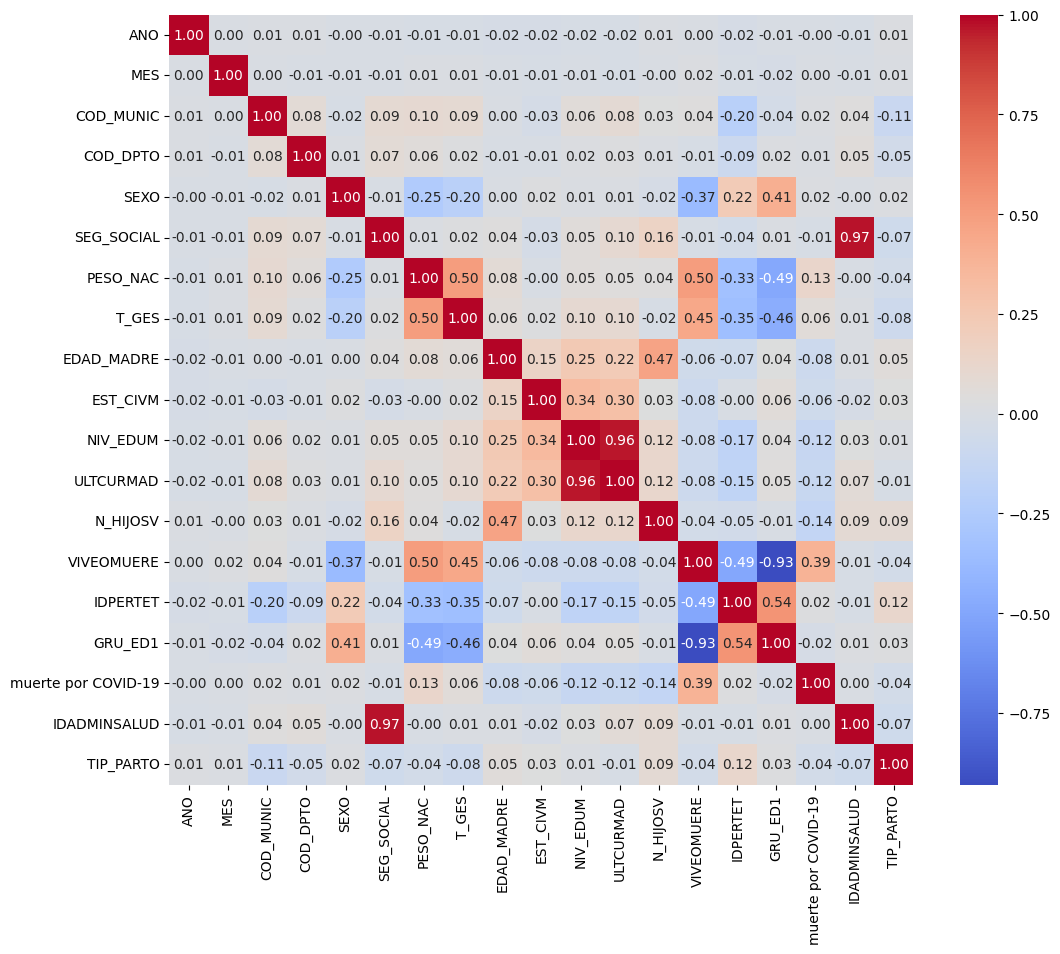

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = data_para_modelos_machine.corr()

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 10))  # Puedes cambiar el tamaño según tus preferencias

# Crea el mapa de calor de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Muestra el gráfico
plt.show()

In [ ]:
data_para_modelos_machine.isnull().sum()

ANO                    0
MES                    0
COD_MUNIC              0
COD_DPTO               0
SEXO                   0
SEG_SOCIAL             0
PESO_NAC               0
T_GES                  0
EDAD_MADRE             0
EST_CIVM               0
NIV_EDUM               0
ULTCURMAD              0
N_HIJOSV               0
VIVEOMUERE             0
IDPERTET               0
GRU_ED1                0
muerte por COVID-19    0
IDADMINSALUD           0
TIP_PARTO              0
AREA_EVENTO            0
dtype: int64

In [ ]:
#Validar balanceo de clases
data_para_modelos_machine['VIVEOMUERE'].value_counts()

1    1246316
0      75960
Name: VIVEOMUERE, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ed7460e9630>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._h

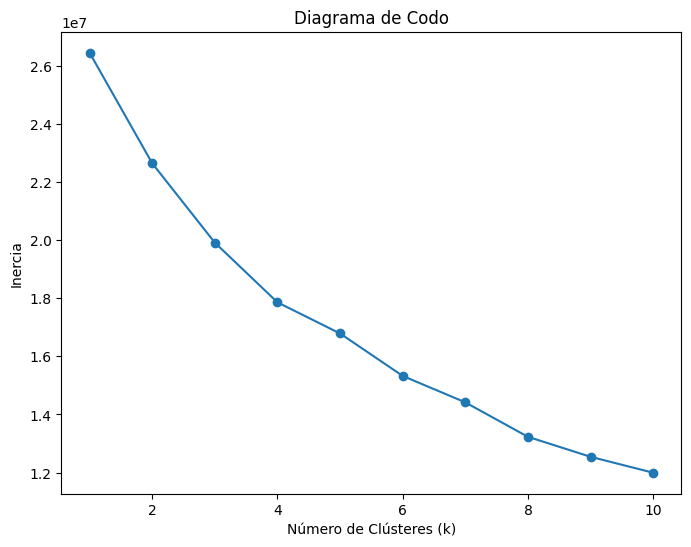

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carga de datos
data = data_para_modelos_machine

# Selecciona las características relevantes para el análisis

selected_features = [
    'ANO', 'MES', 'COD_MUNIC', 'COD_DPTO', 'SEXO', 'SEG_SOCIAL', 'PESO_NAC', 'T_GES',
    'EDAD_MADRE', 'EST_CIVM', 'NIV_EDUM', 'ULTCURMAD', 'N_HIJOSV', 'VIVEOMUERE',
    'IDPERTET', 'GRU_ED1', 'muerte por COVID-19', 'IDADMINSALUD', 'TIP_PARTO', 'AREA_EVENTO'
]

# Filtrar y seleccionar solo las características relevantes
data = data[selected_features]

# Manejo de datos faltantes (NaN)
data = data.dropna()

# Estandariza los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Calcula la inercia (suma de las distancias cuadradas intra-clúster) para diferentes valores de k
inertia = []
for k in range(1, 11):  # Probando con k desde 1 hasta 10 clústeres
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Visualiza el diagrama de codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Diagrama de Codo')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


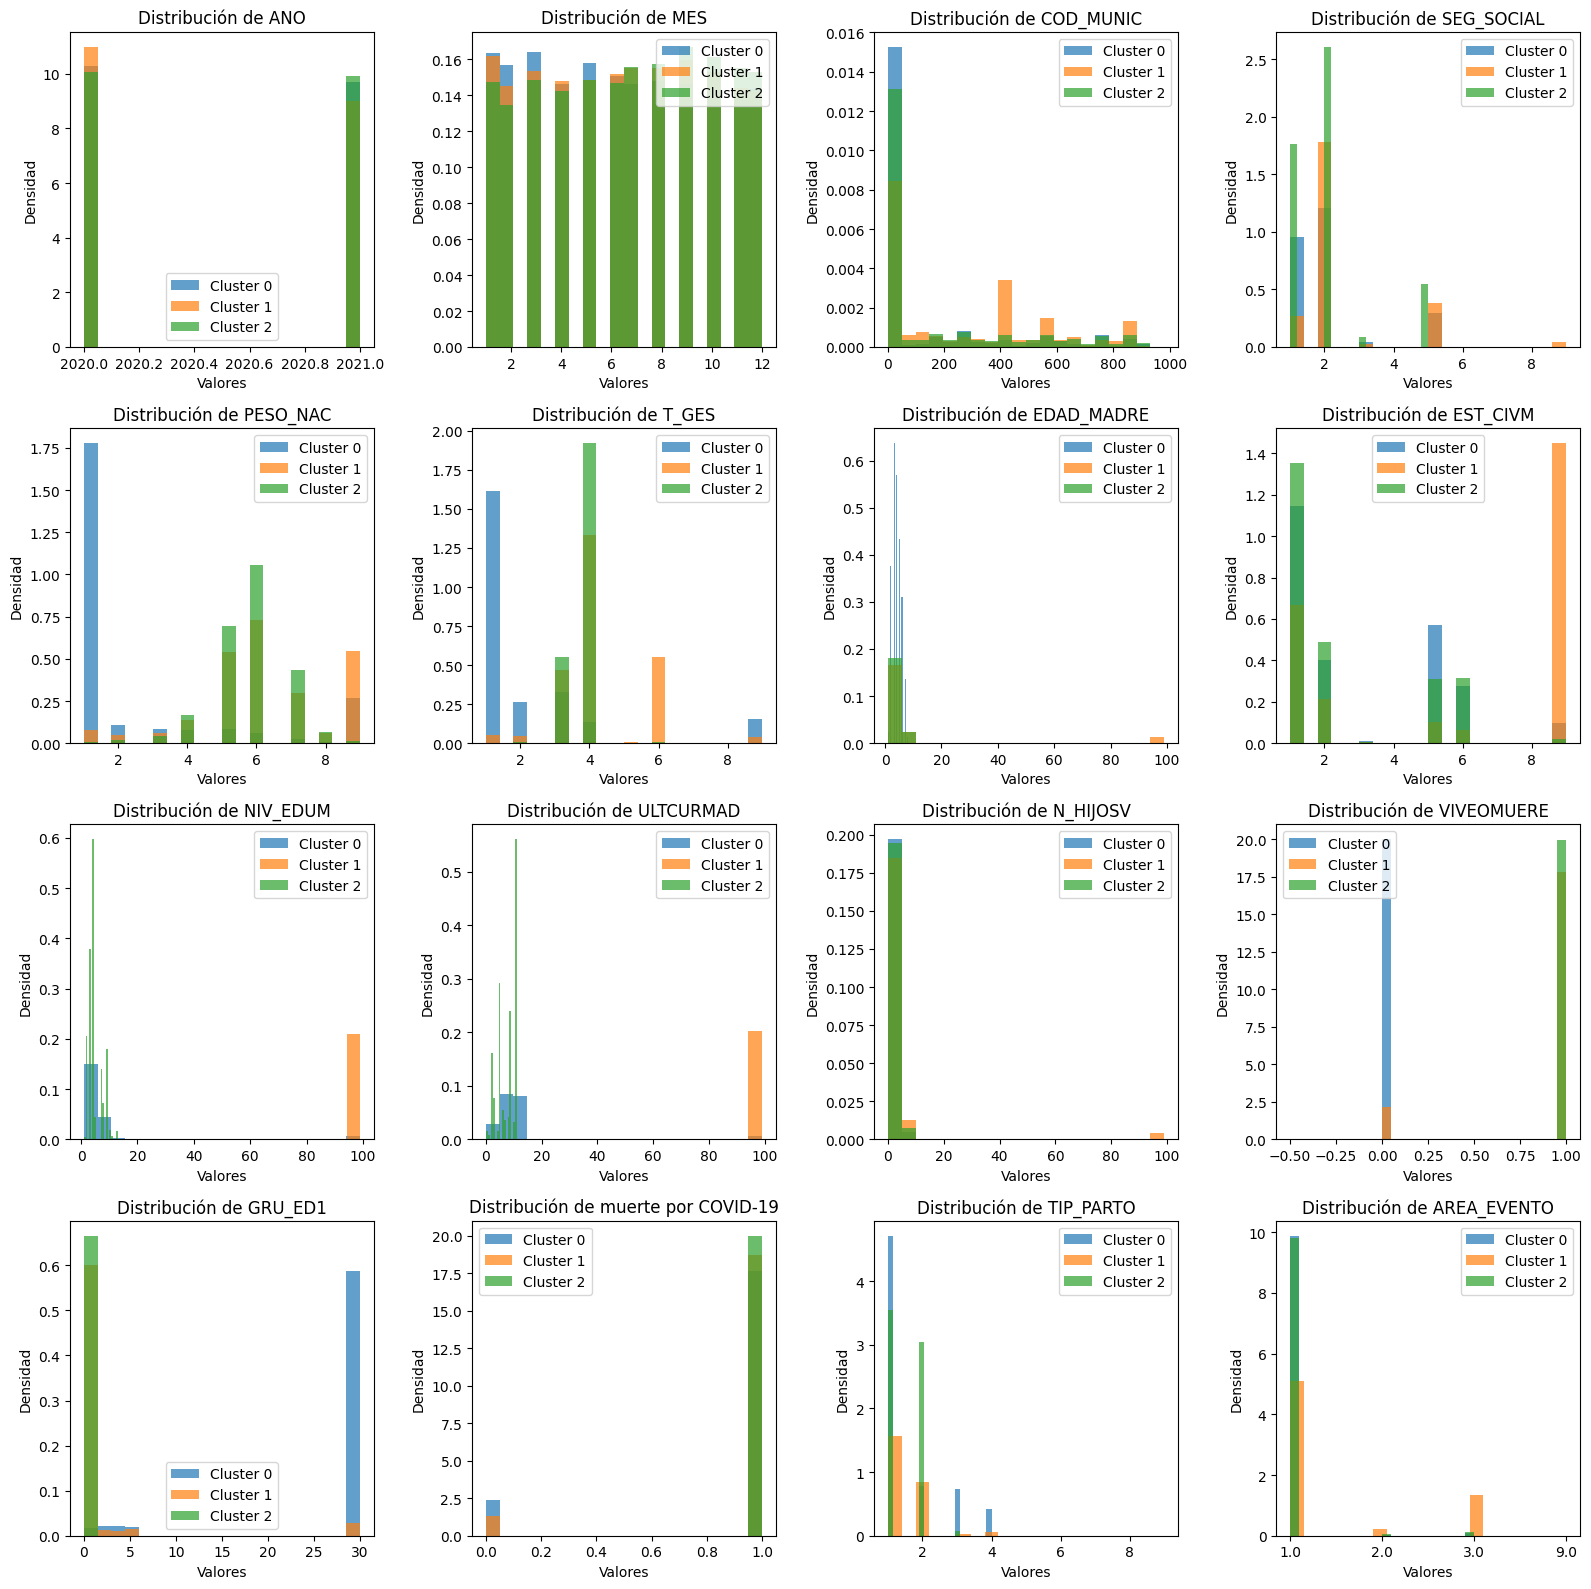

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carga tus datos
data = data_para_modelos_machine

# Selecciona las características relevantes para el análisis
selected_features = [
    'ANO', 'MES', 'COD_MUNIC', 'SEG_SOCIAL', 'PESO_NAC', 'T_GES',
    'EDAD_MADRE', 'EST_CIVM', 'NIV_EDUM', 'ULTCURMAD', 'N_HIJOSV', 'VIVEOMUERE',
    'GRU_ED1', 'muerte por COVID-19', 'TIP_PARTO', 'AREA_EVENTO'
]

# Filtra y selecciona solo las características relevantes
data = data[selected_features]

# Manejo de datos faltantes (NaN)
data = data.dropna()

# Estandariza los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Crea un modelo K-Means con k=3 (n_clusters=3)
cluster_labels = KMeans(n_clusters=3, random_state=0).fit_predict(data_scaled)

# Agrega las etiquetas de clúster al DataFrame original
data['Cluster'] = cluster_labels

# Crear subplots para mostrar las distribuciones
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for i, feature in enumerate(selected_features):
    row, col = divmod(i, 4)
    for cluster in range(3):
        data_cluster = data[data['Cluster'] == cluster]
        ax = axes[row, col]
        ax.hist(data_cluster[feature], alpha=0.7, label=f'Cluster {cluster}', bins=20, density=True)
        ax.set_title(f'Distribución de {feature}')
        ax.set_xlabel("Valores")
        ax.set_ylabel("Densidad")
        ax.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


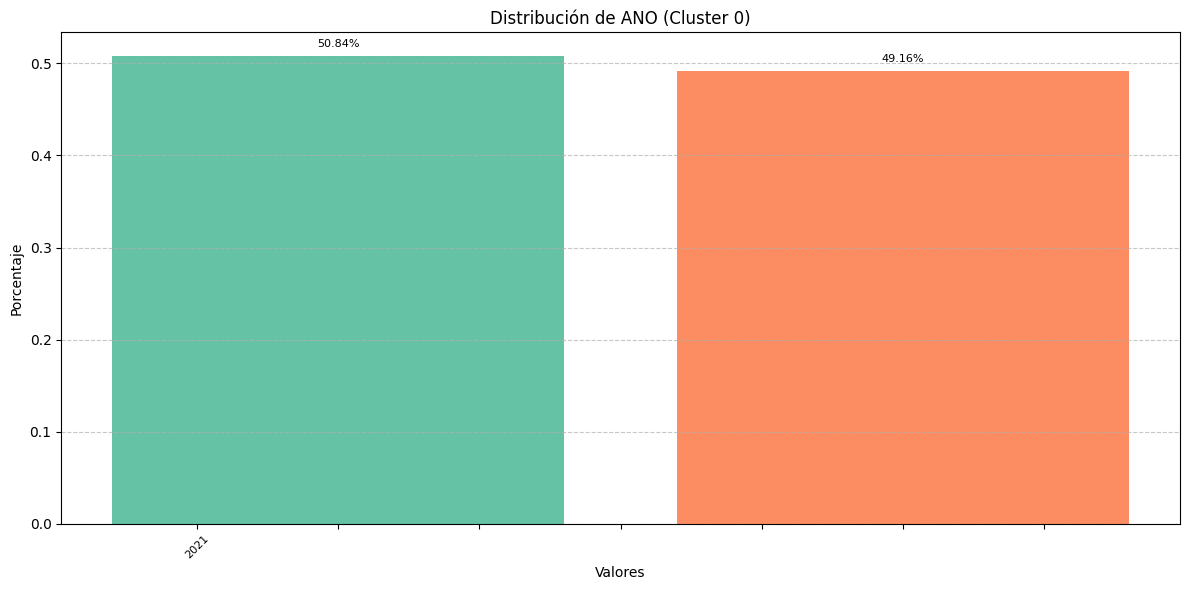

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


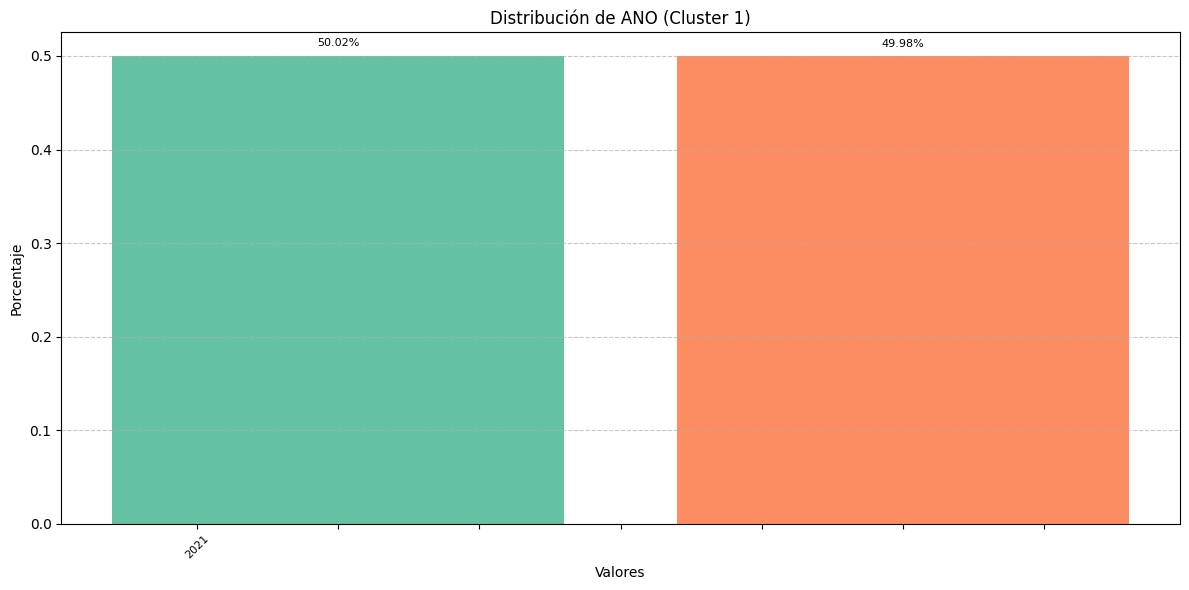

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


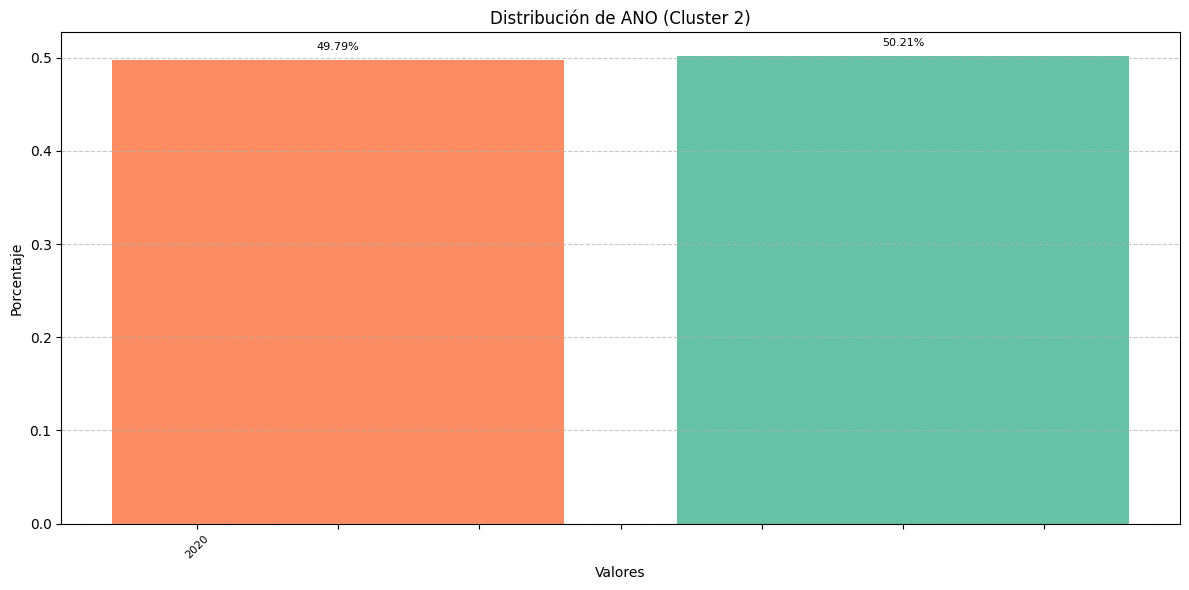

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


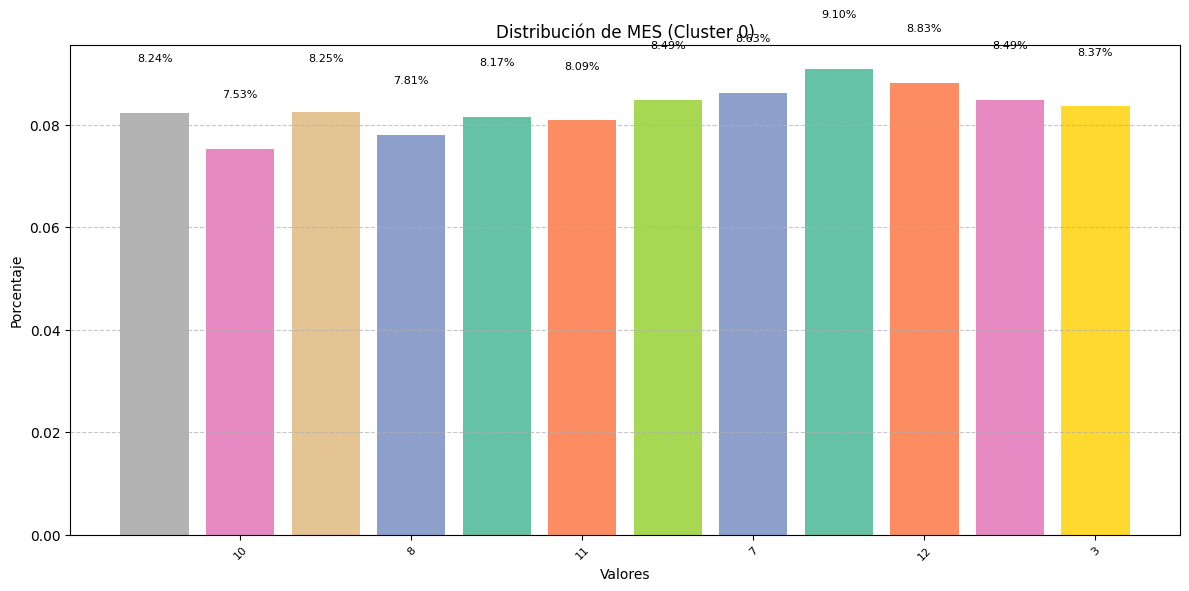

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


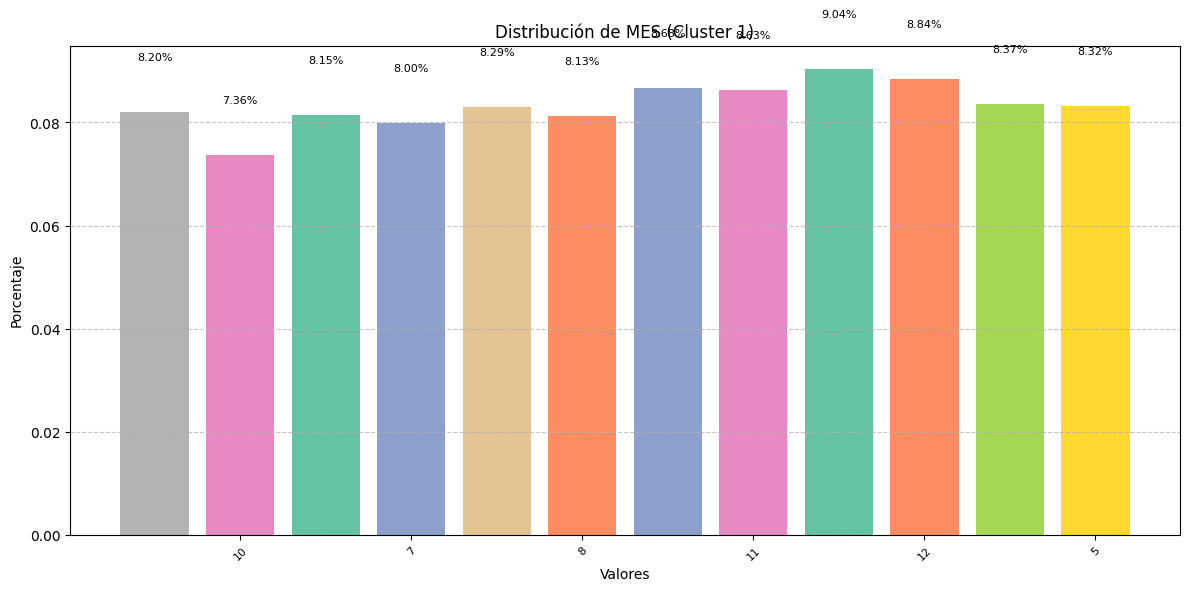

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


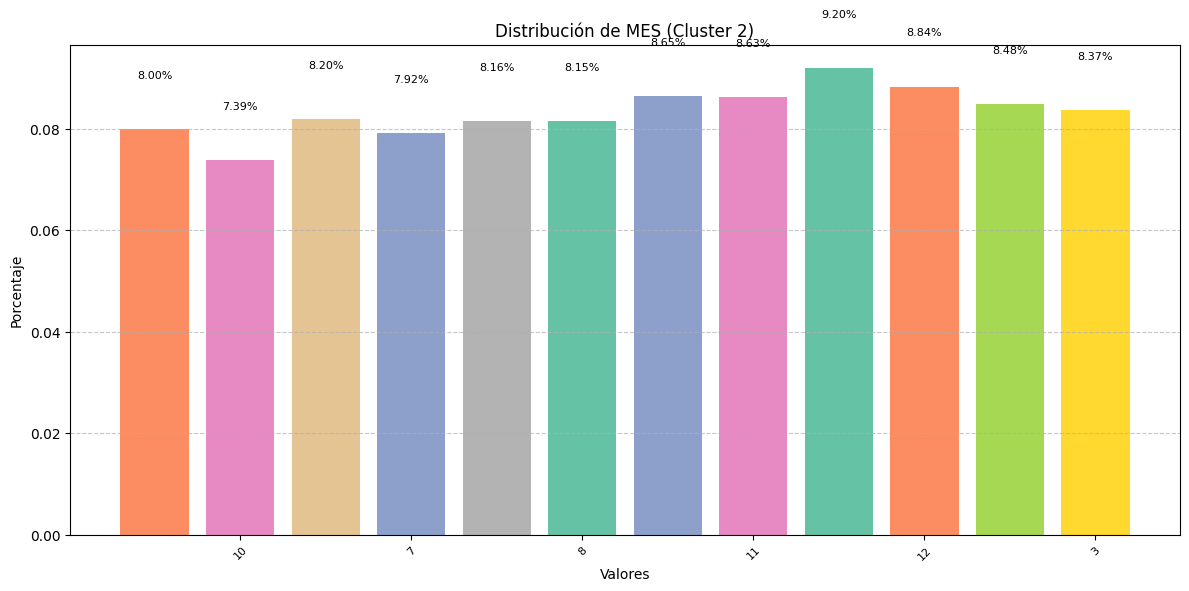

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


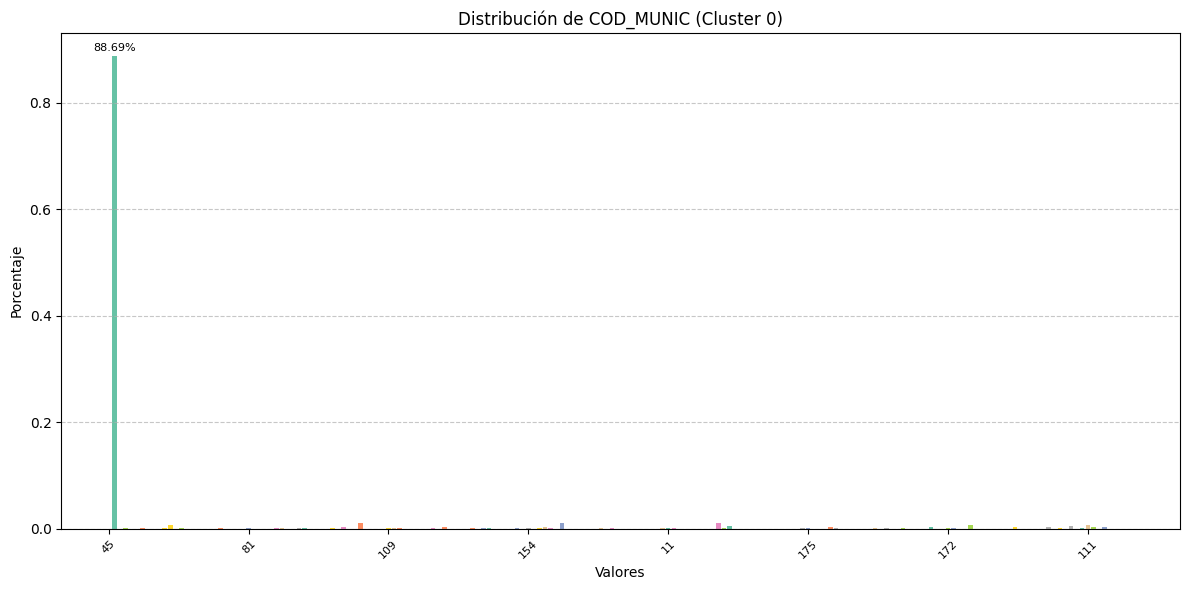

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


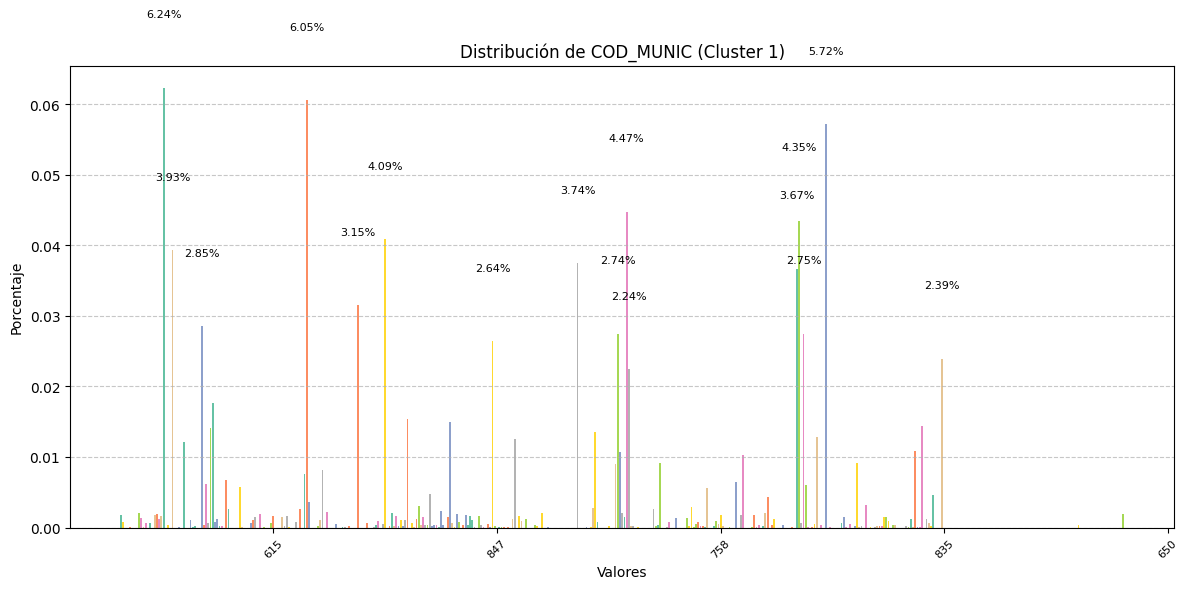

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


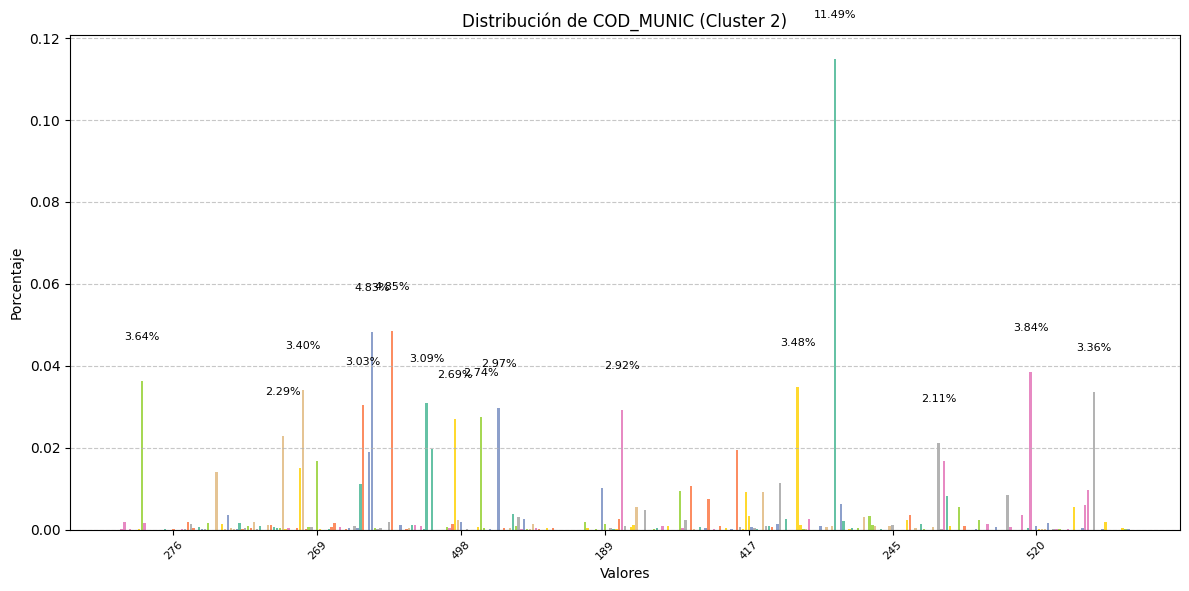

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


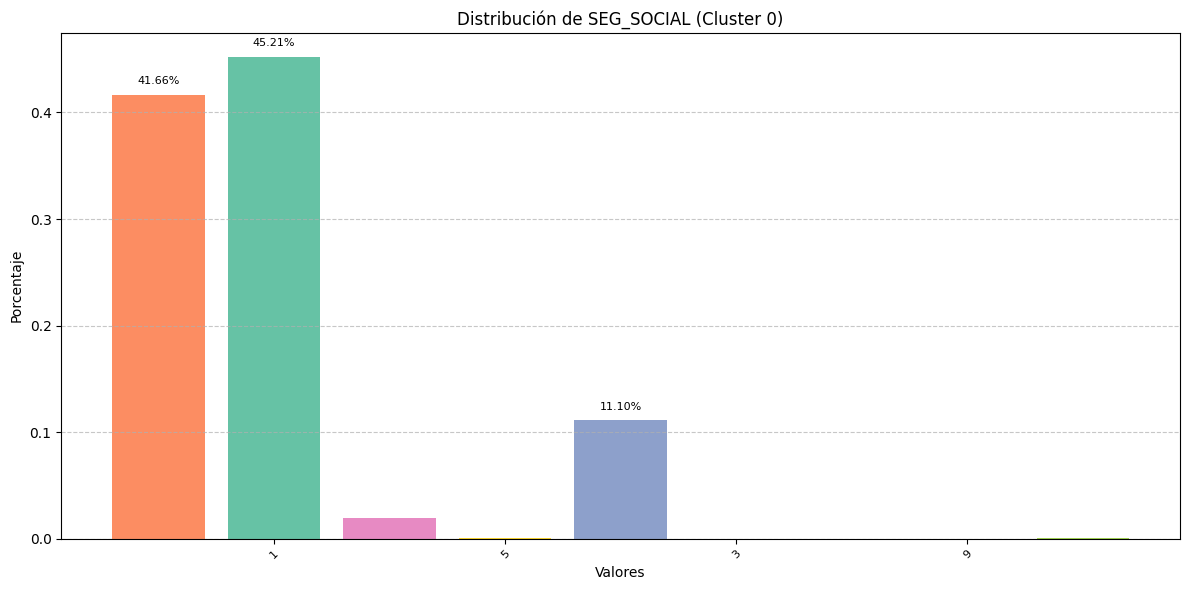

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


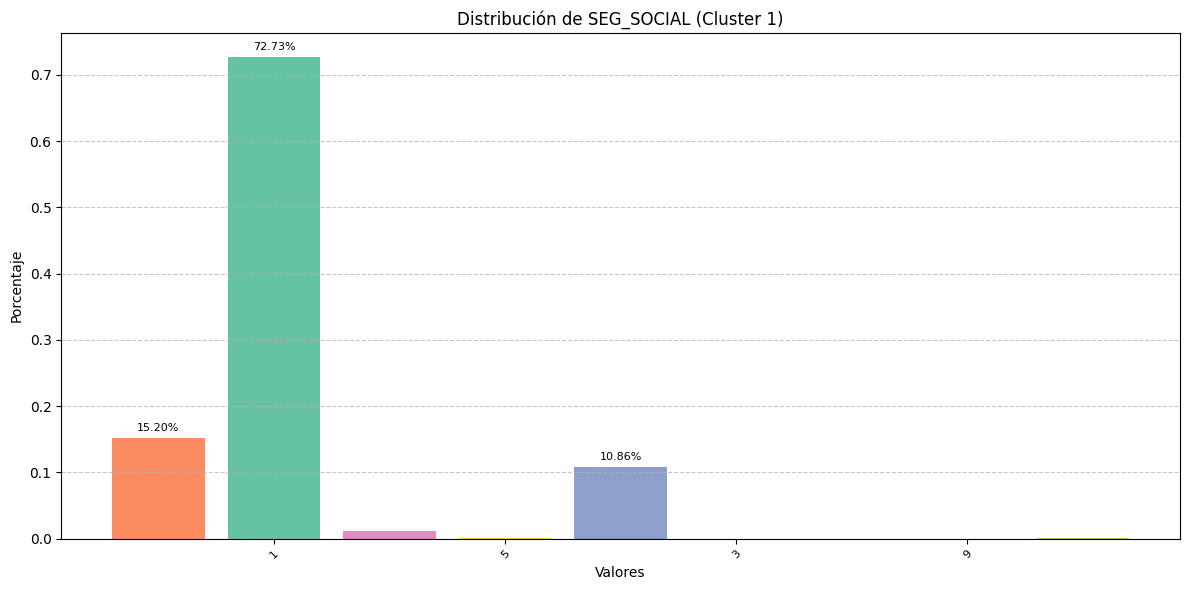

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


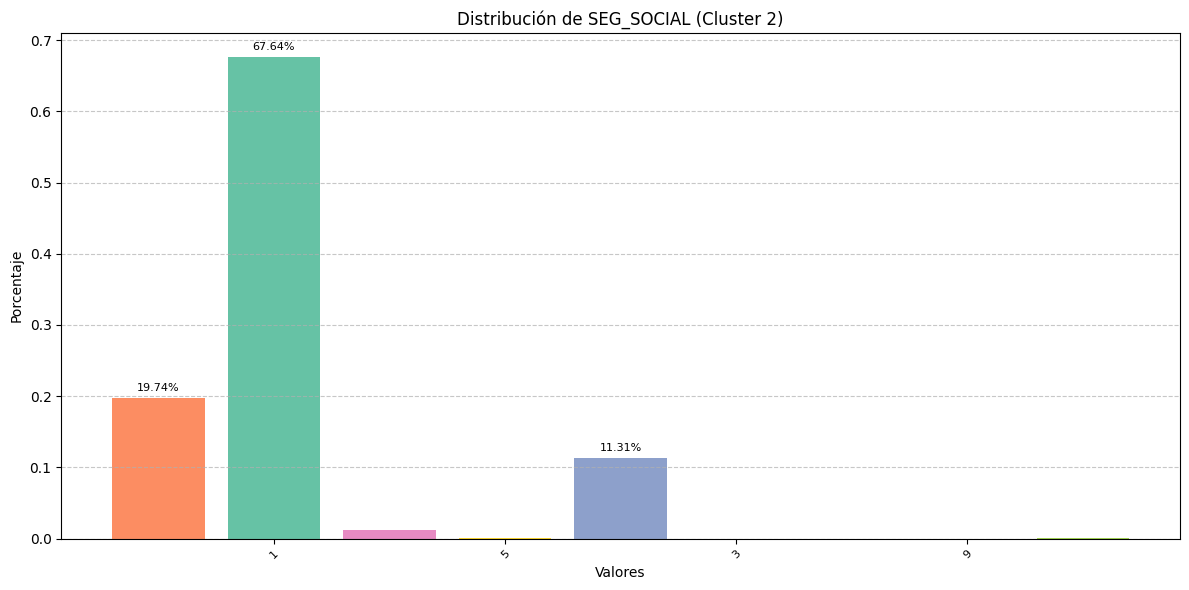

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


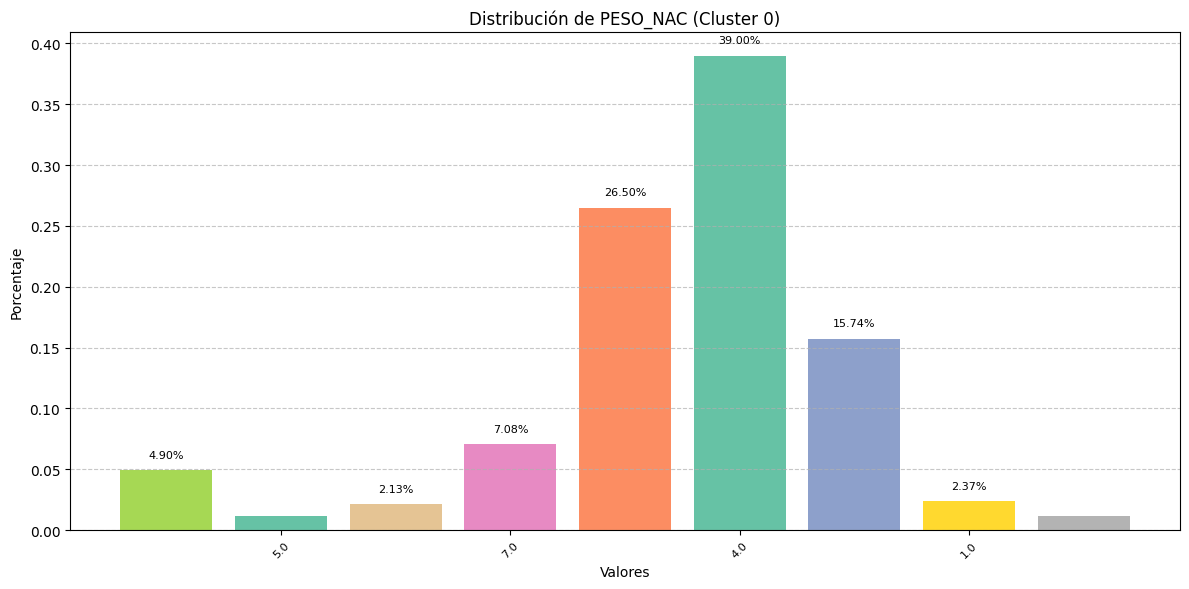

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


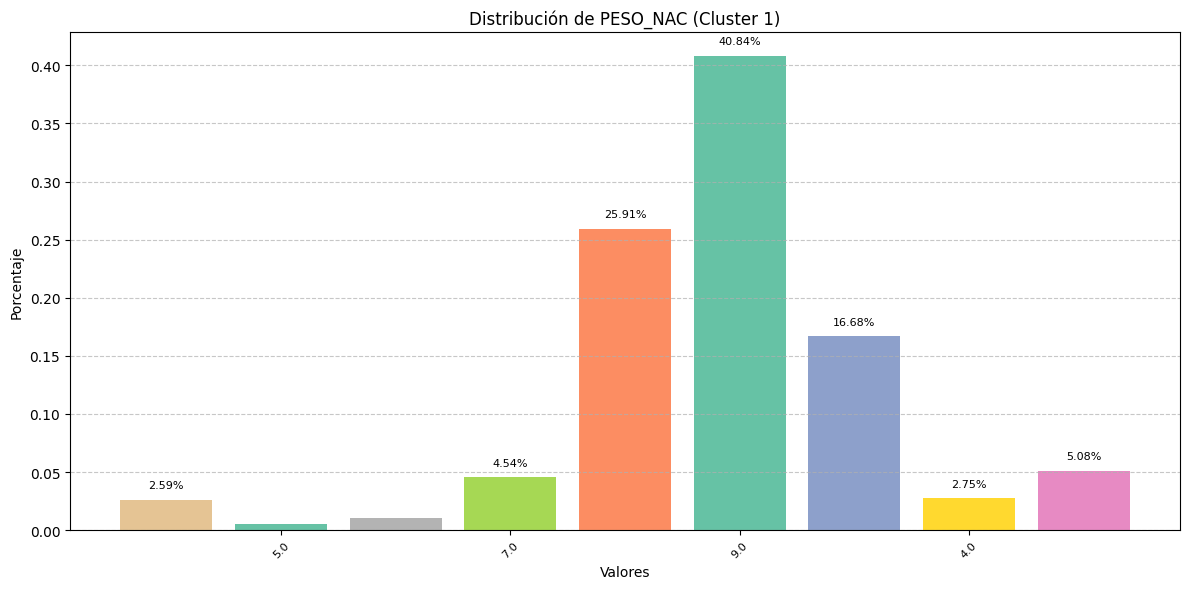

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


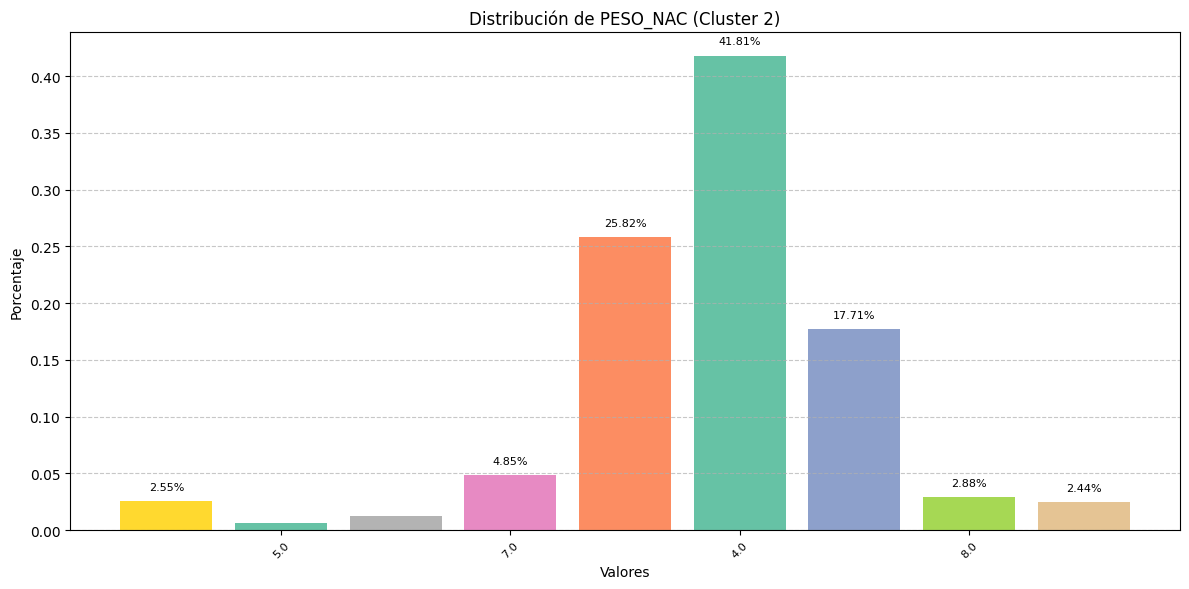

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


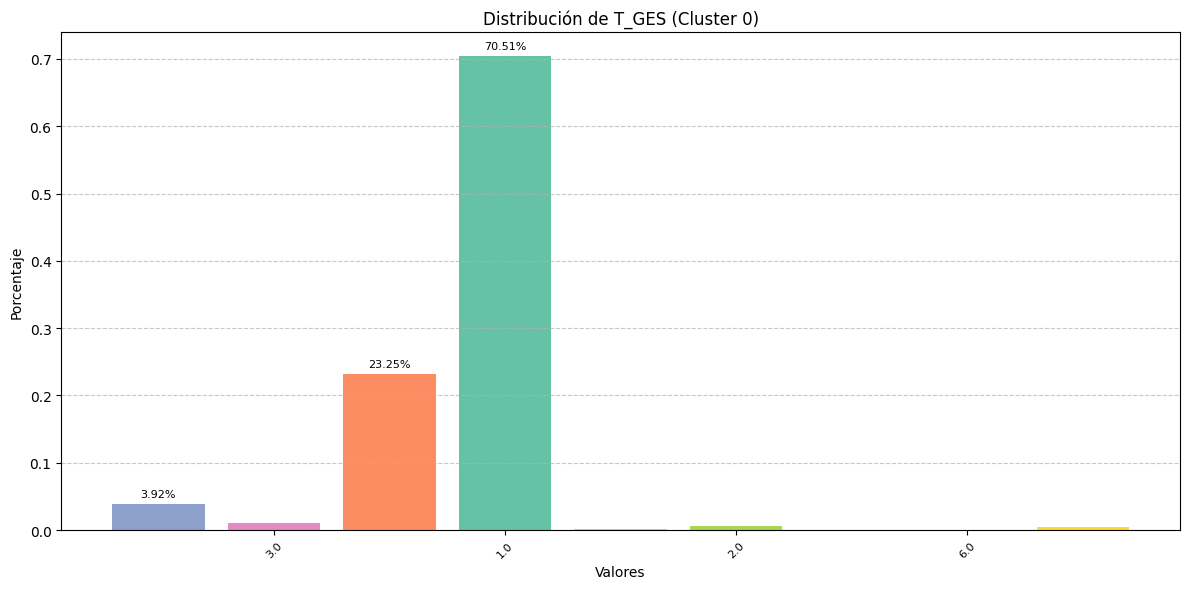

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


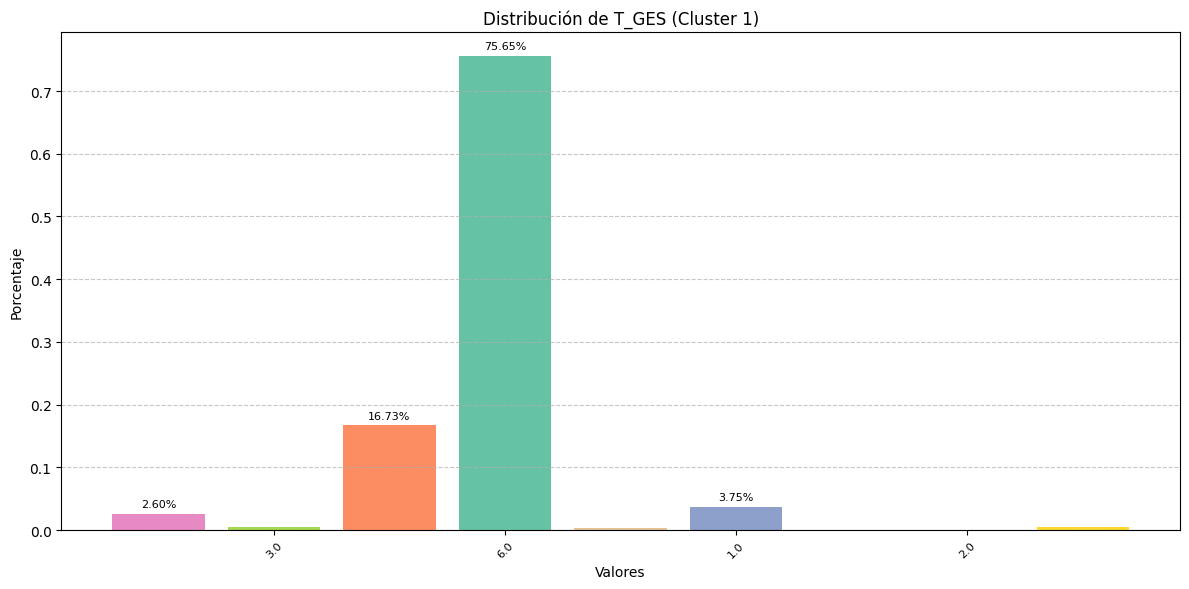

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


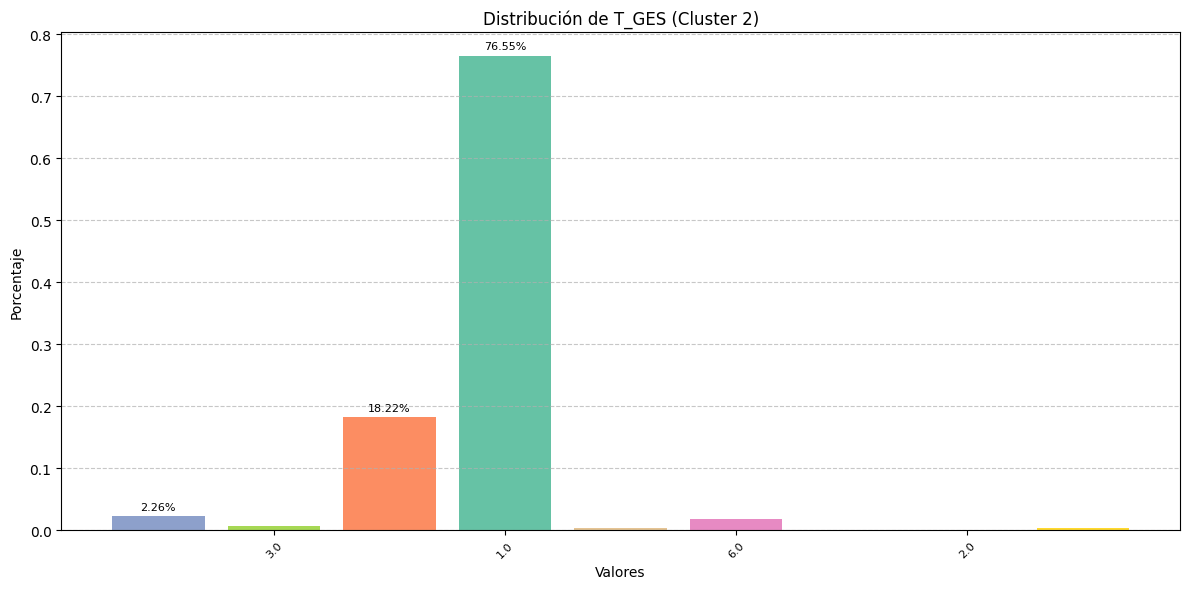

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


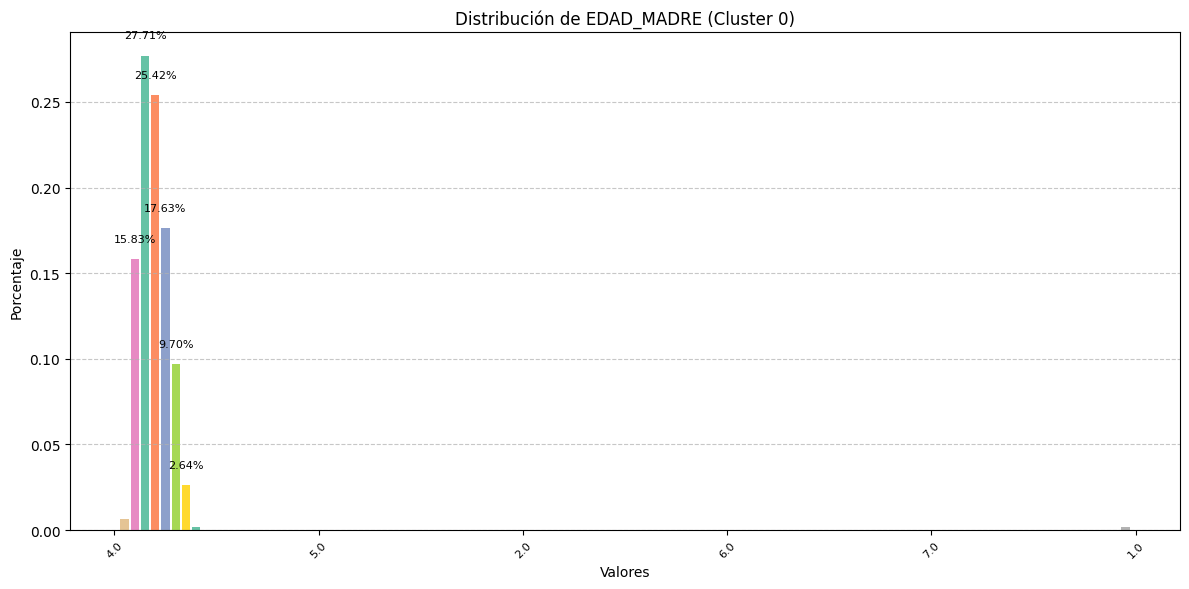

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


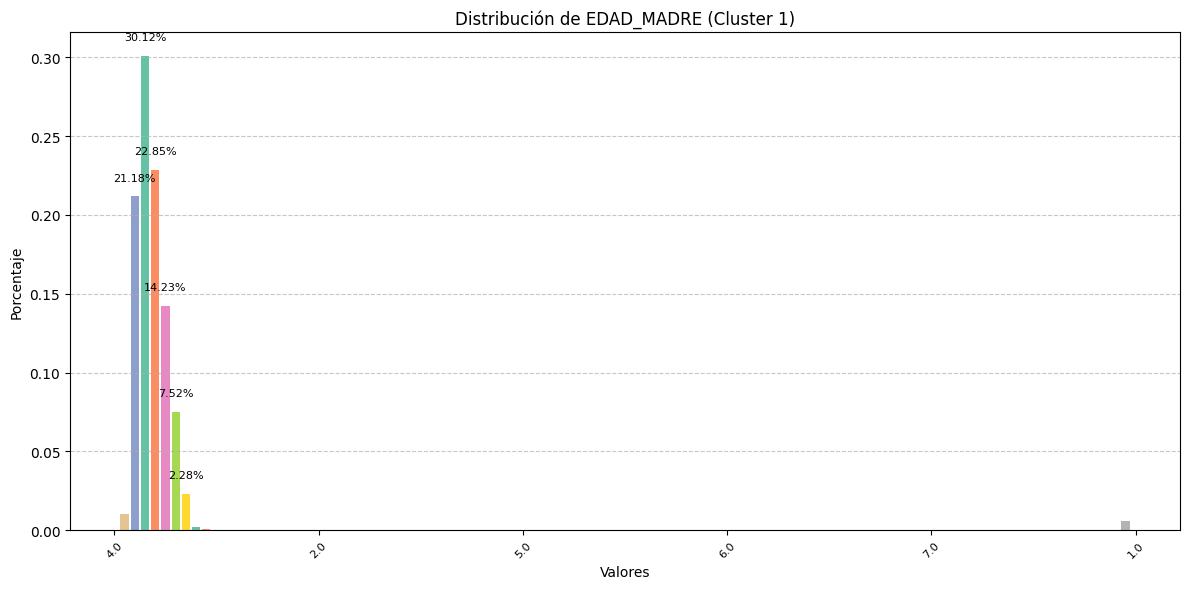

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


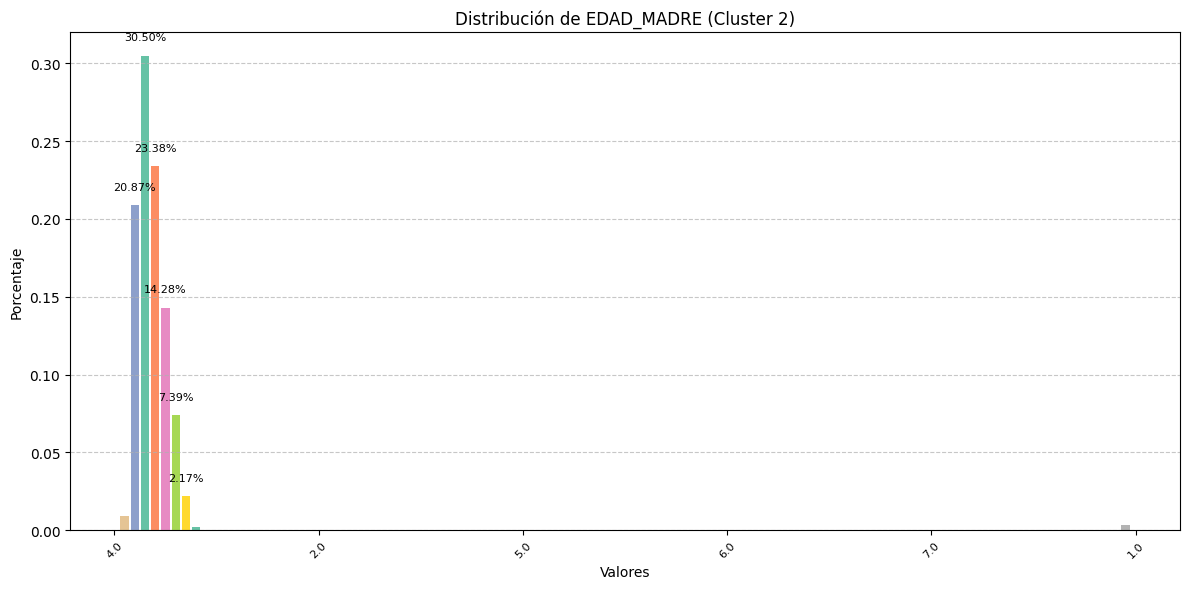

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


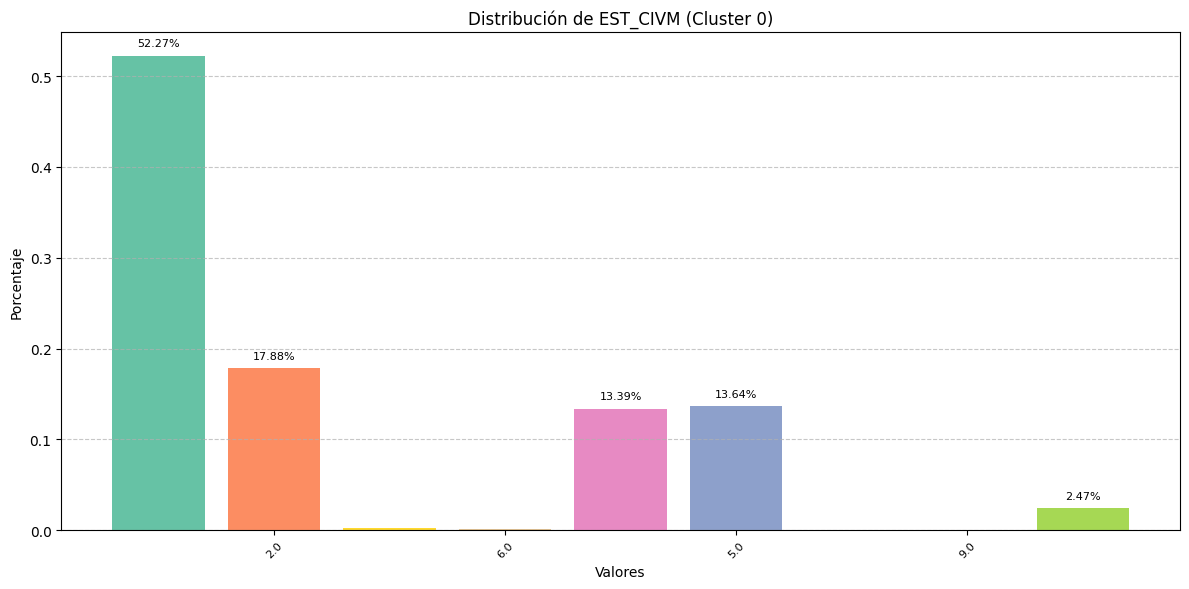

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


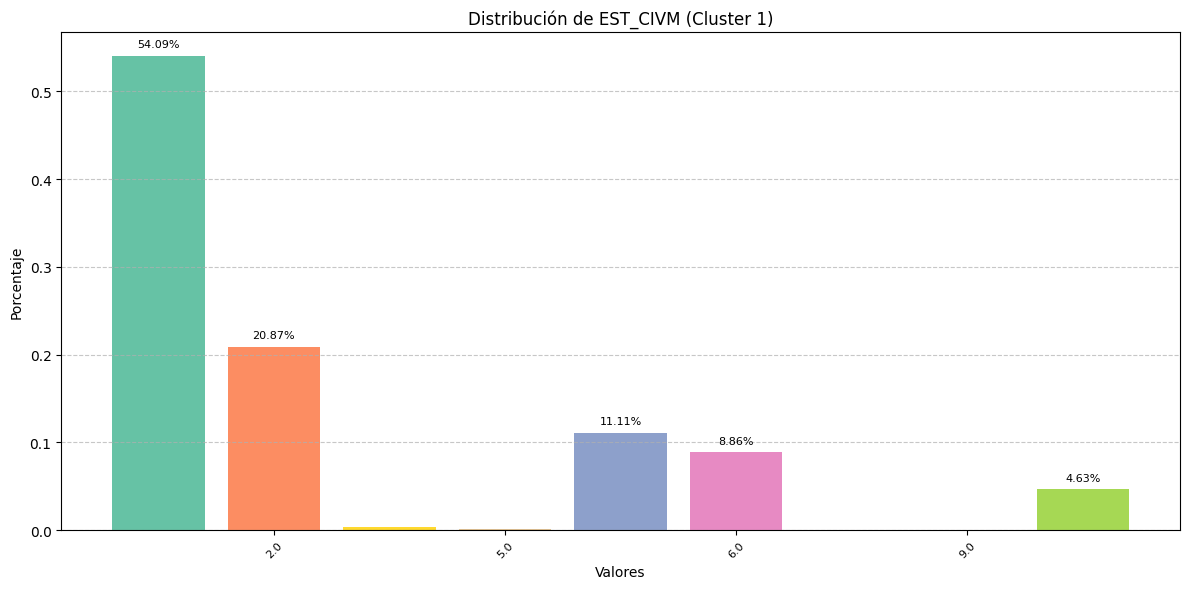

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


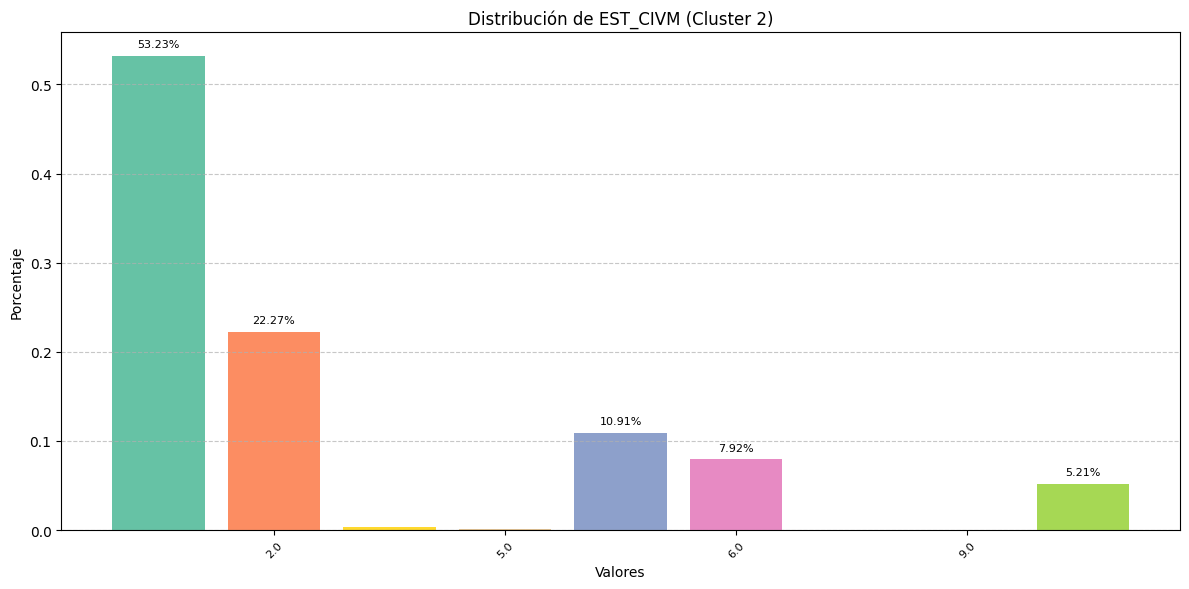

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


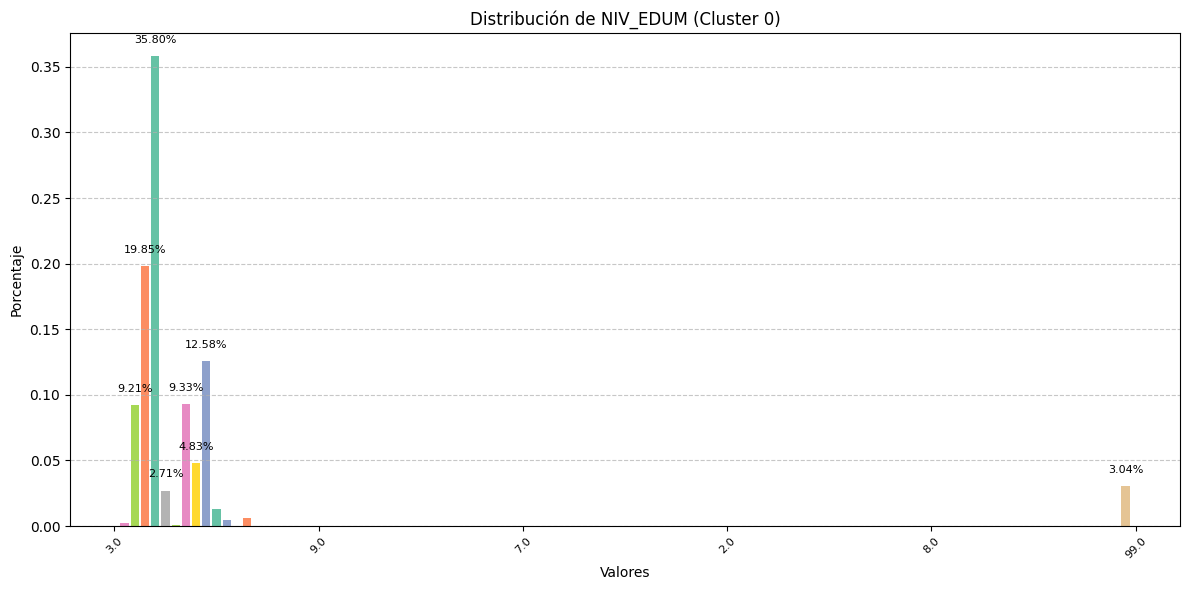

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


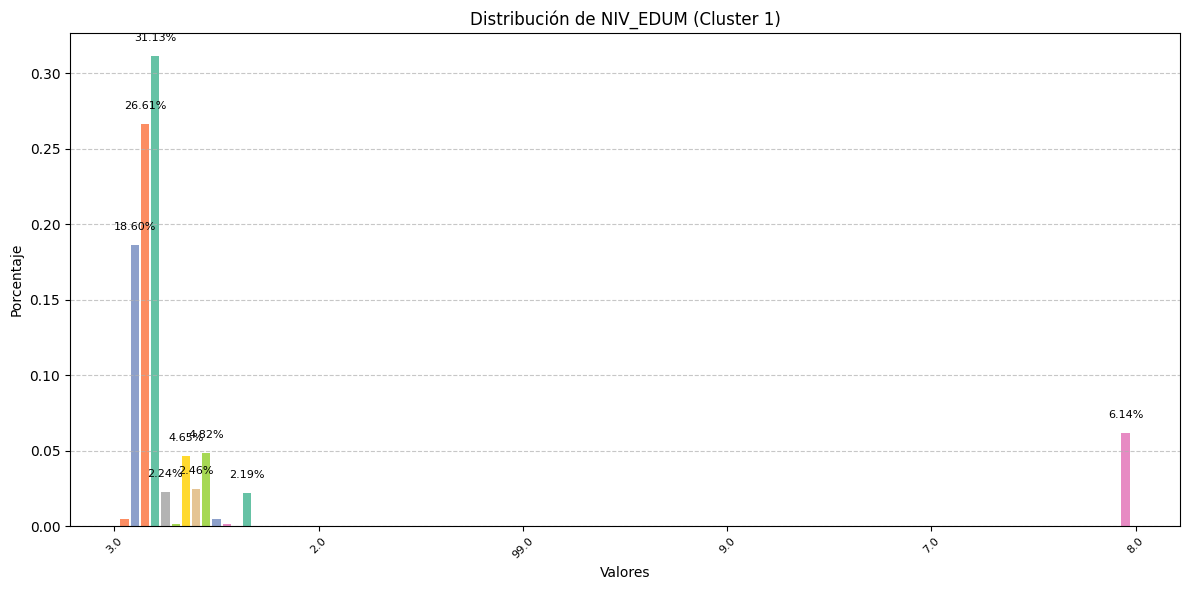

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


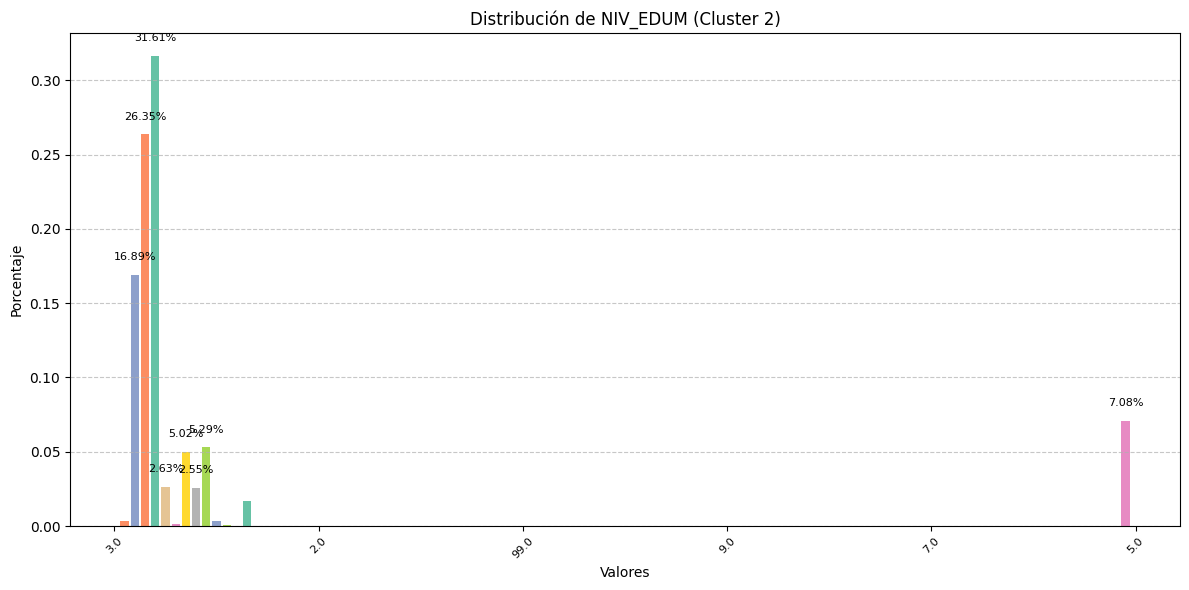

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


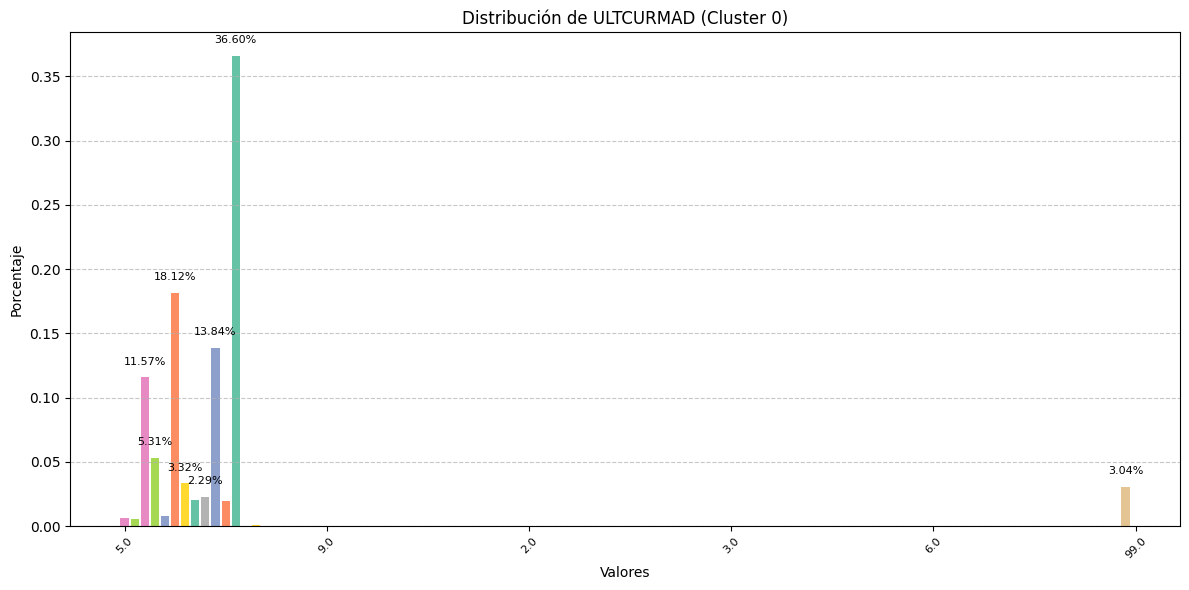

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


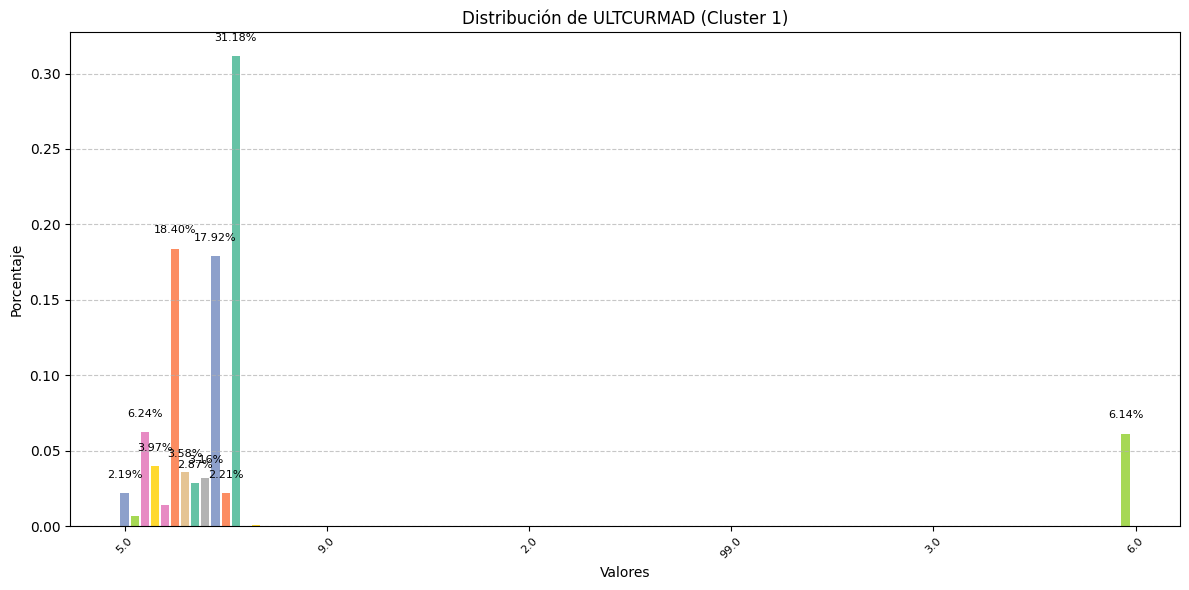

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


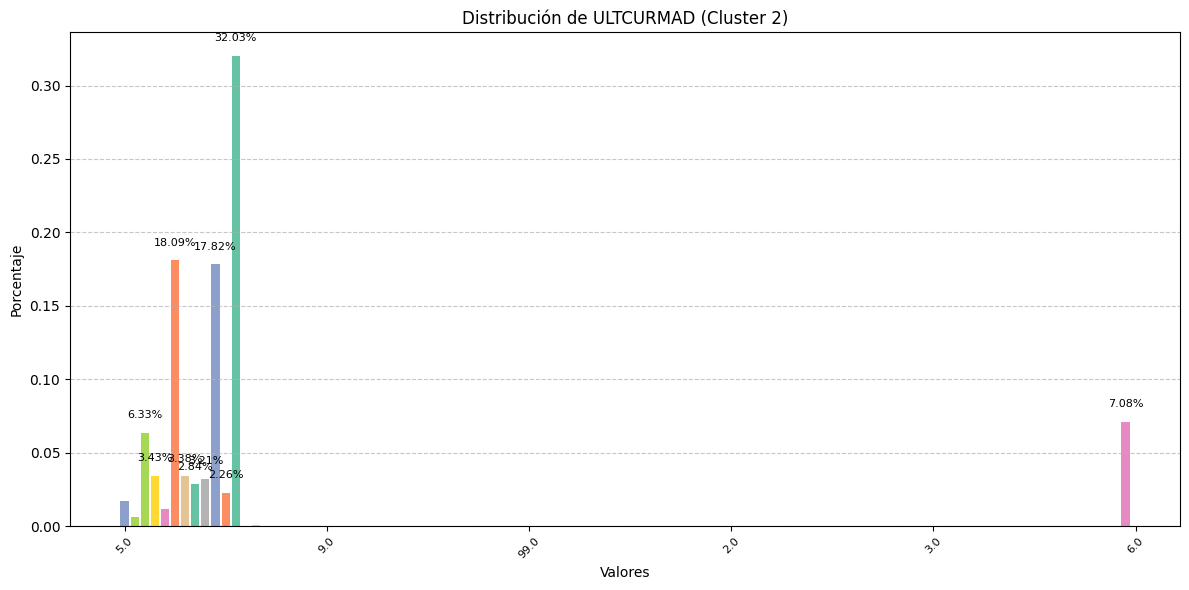

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


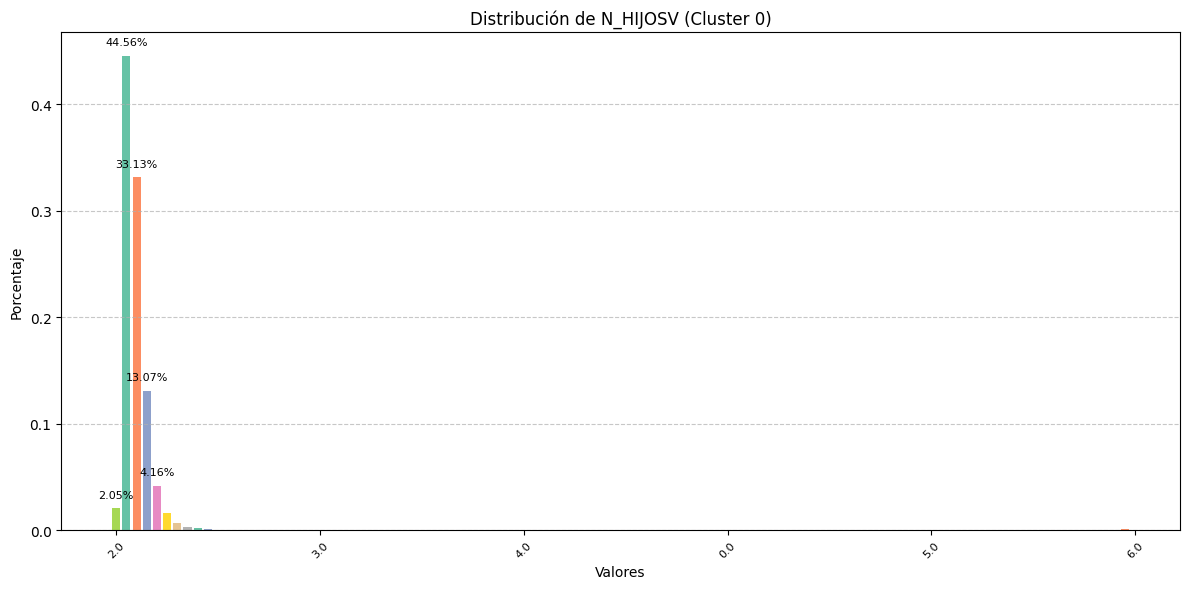

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


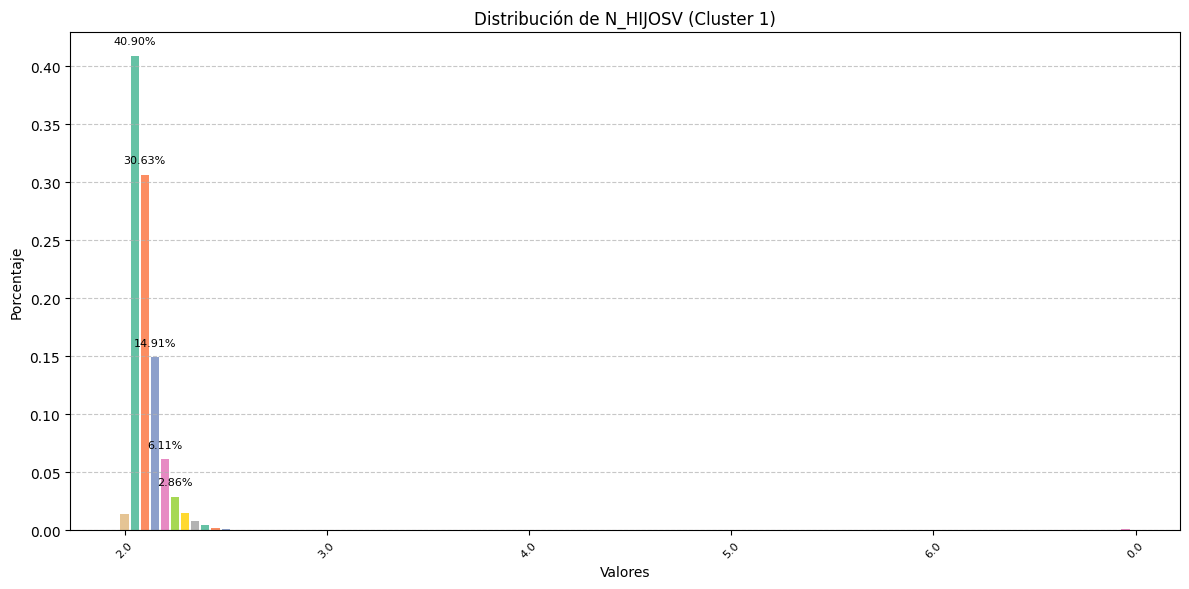

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


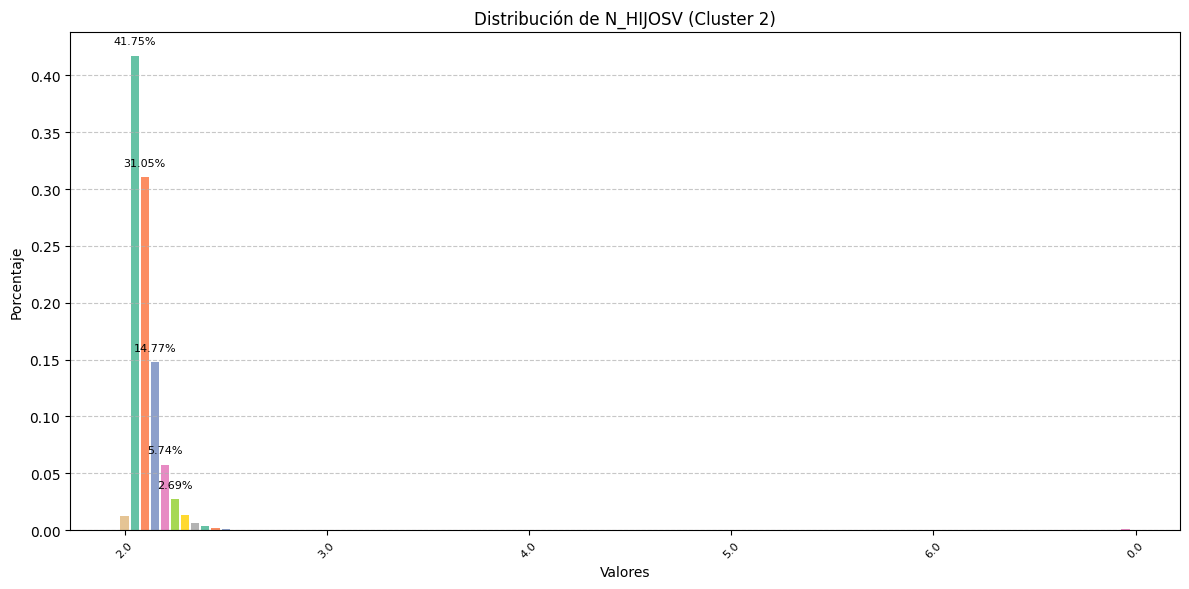

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


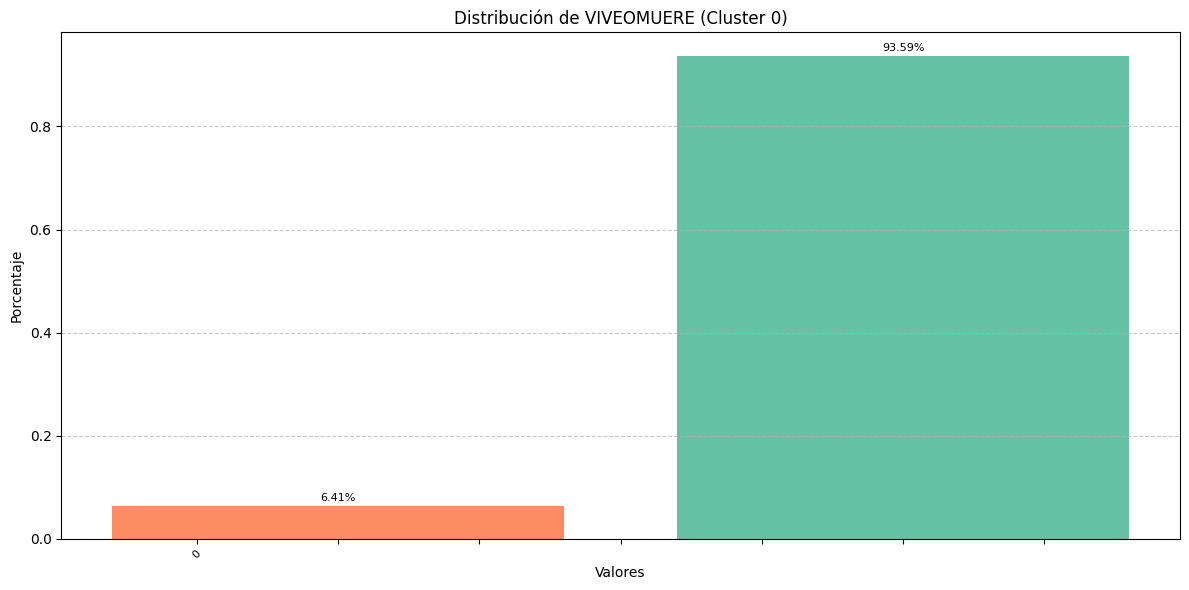

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


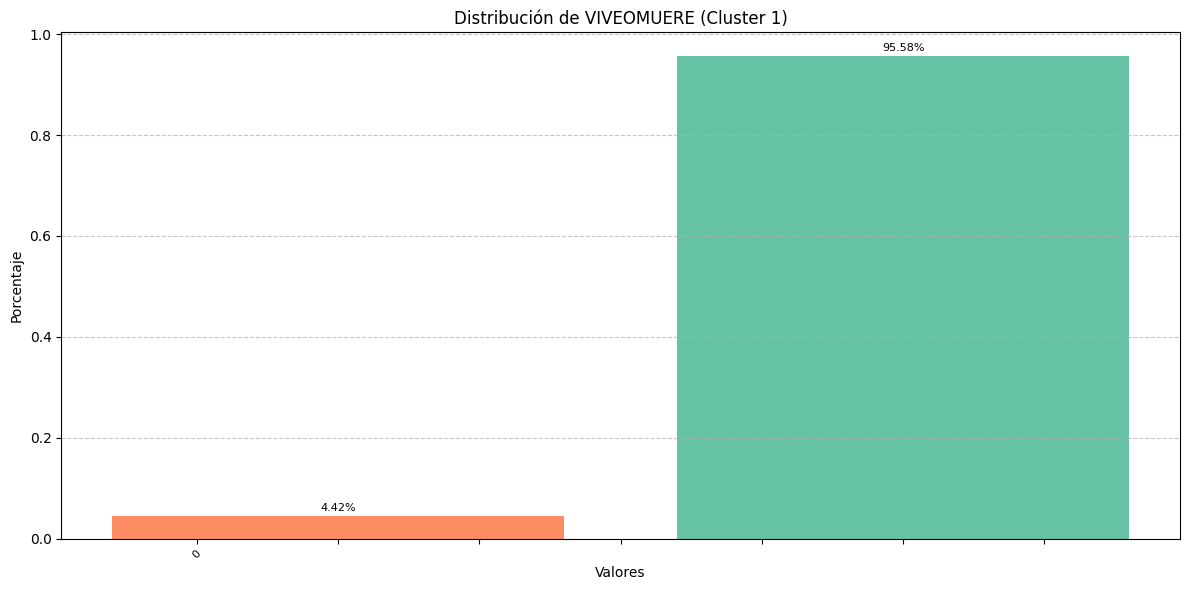

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


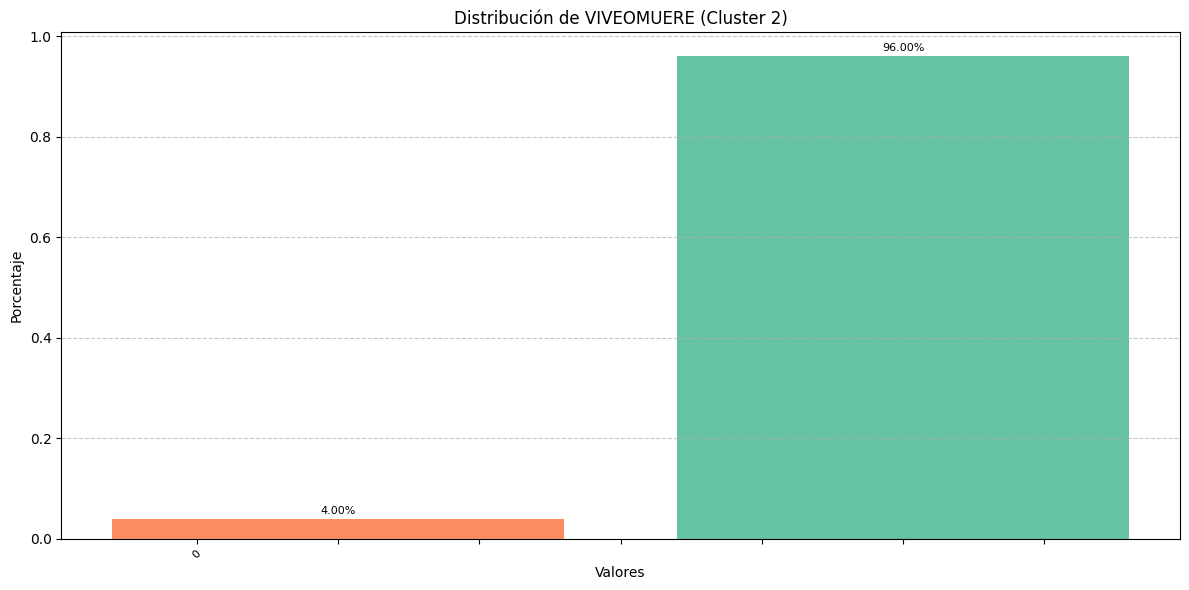

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


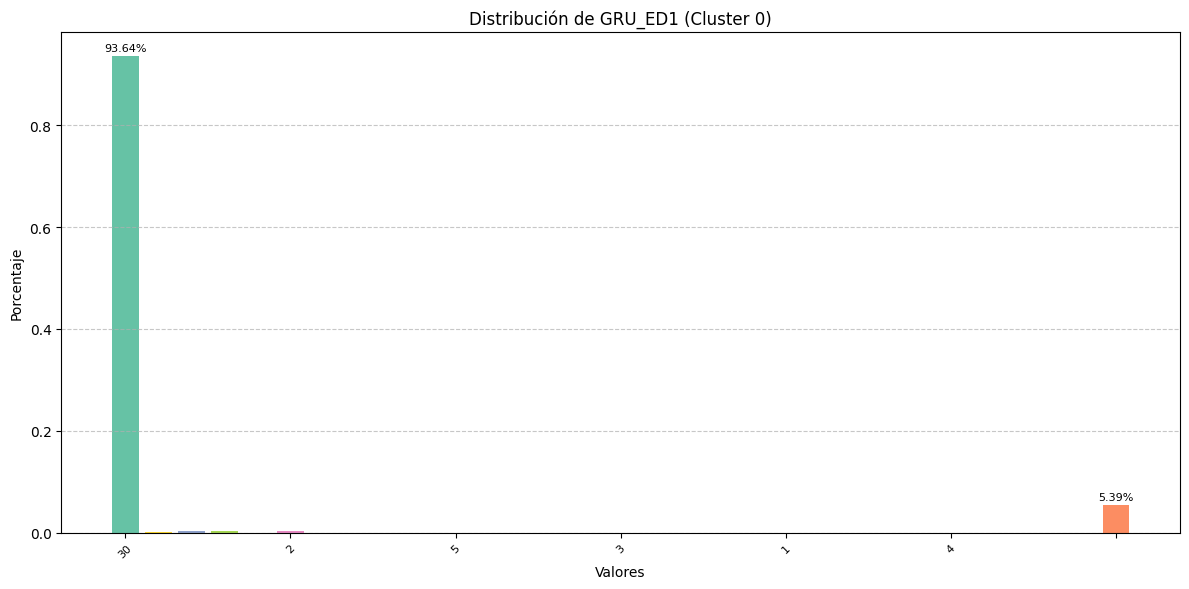

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


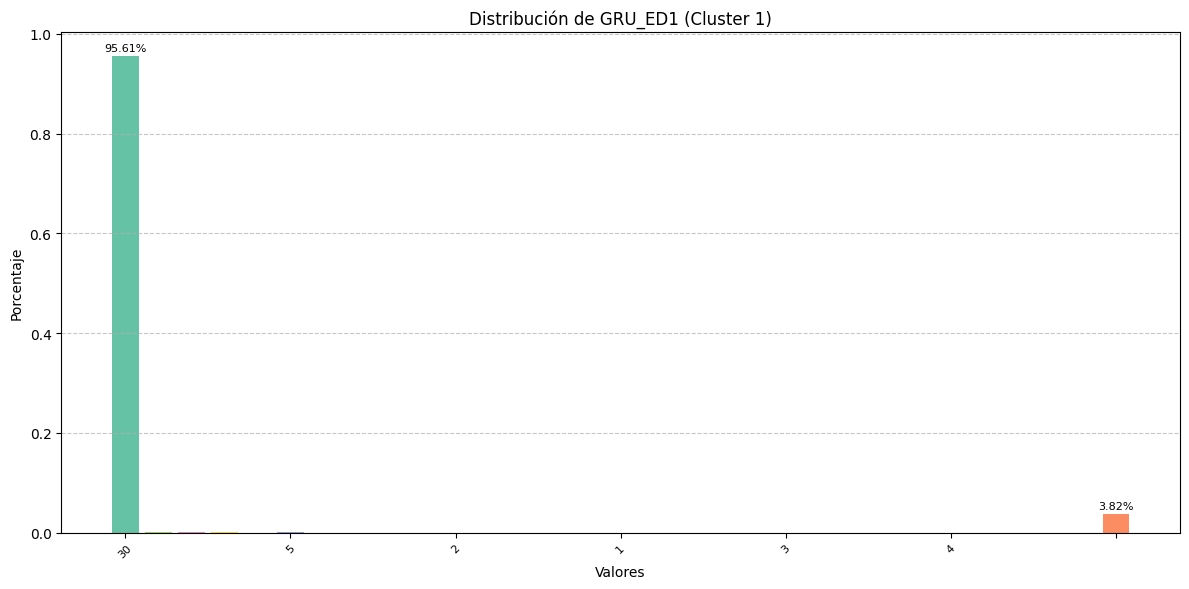

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


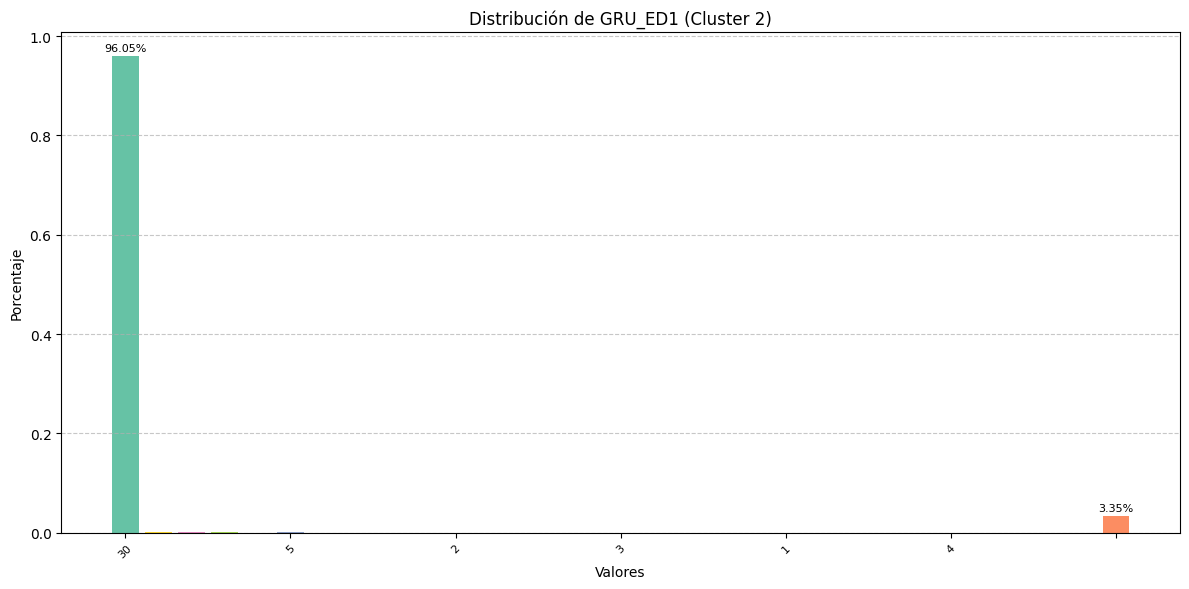

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


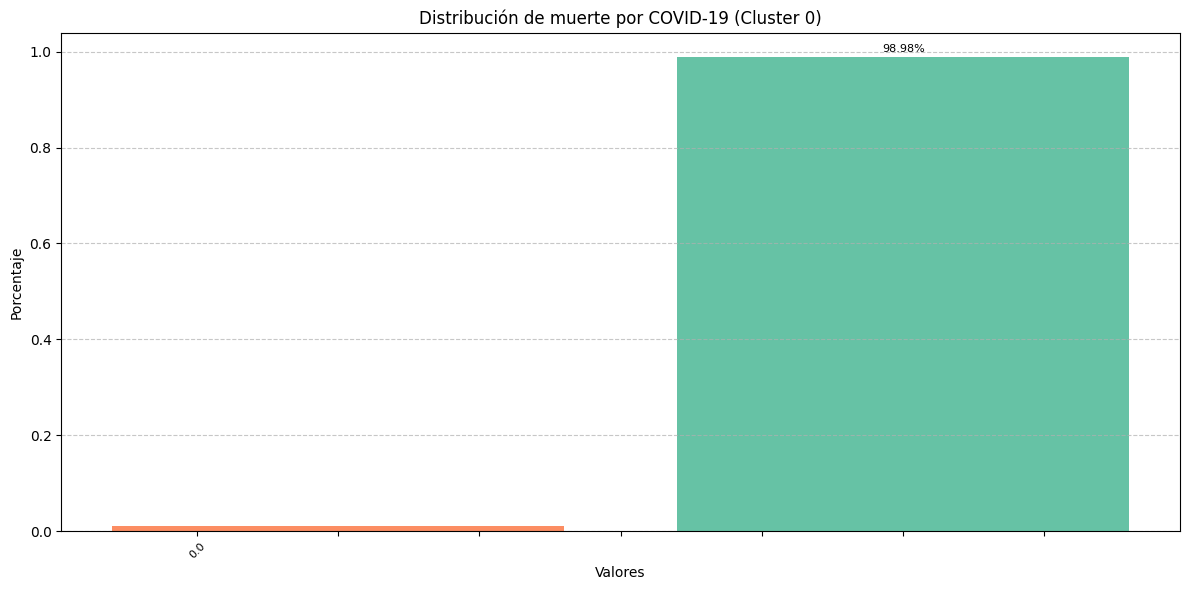

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


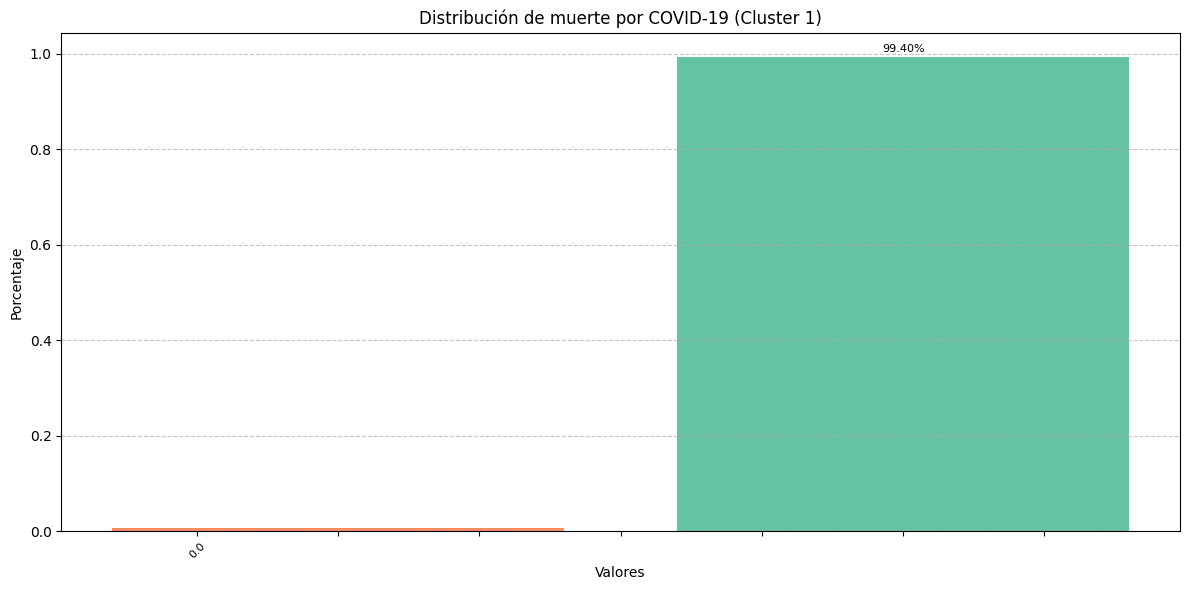

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


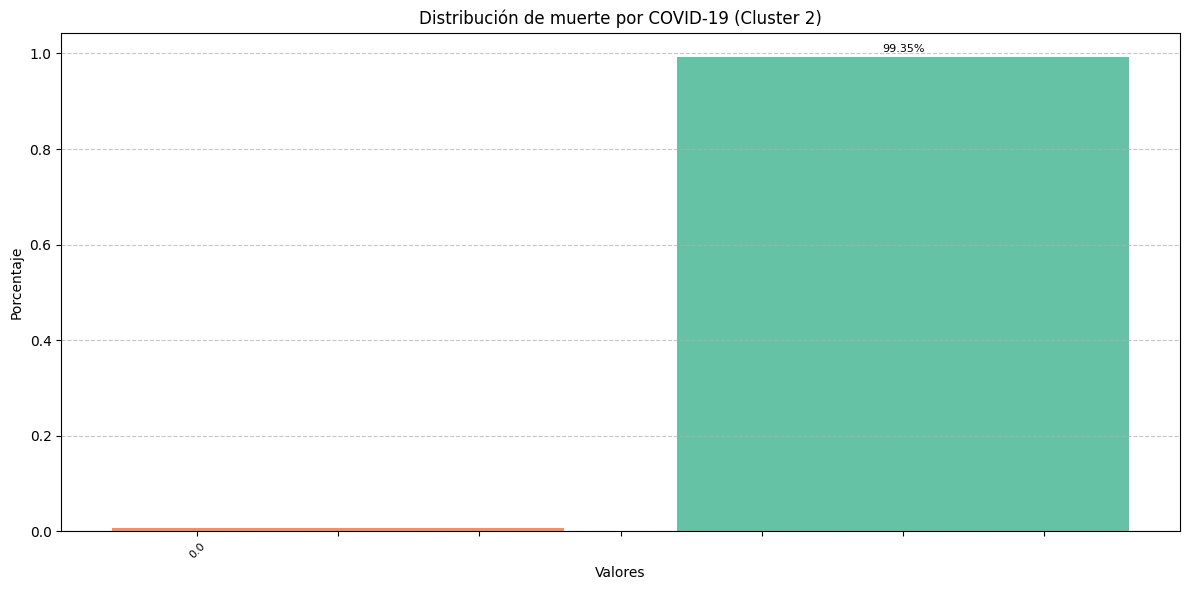

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


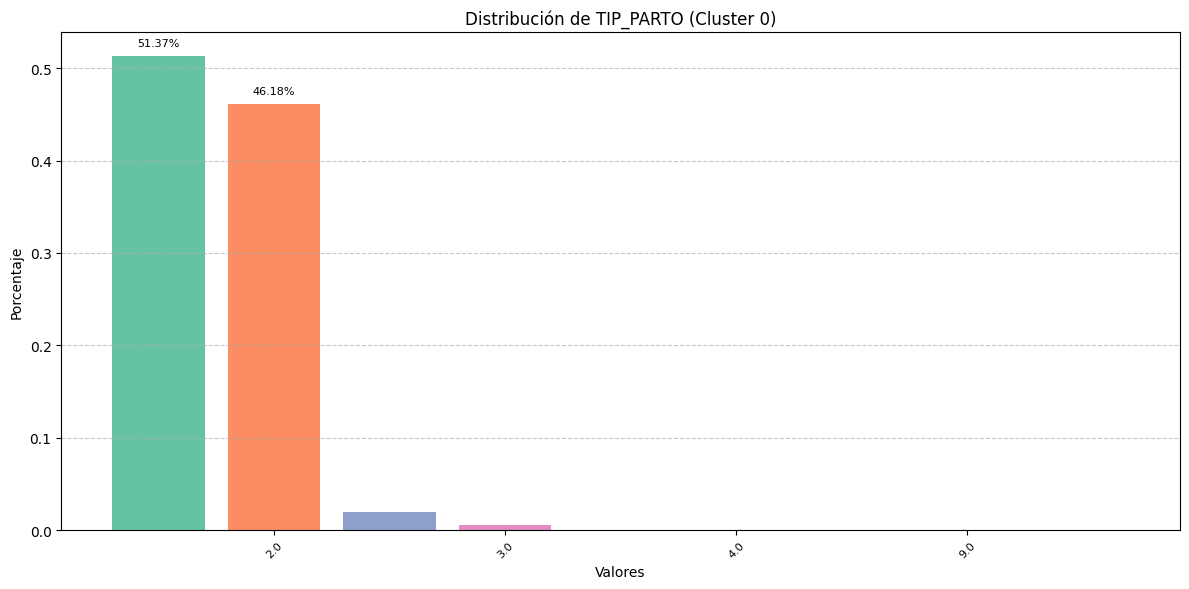

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


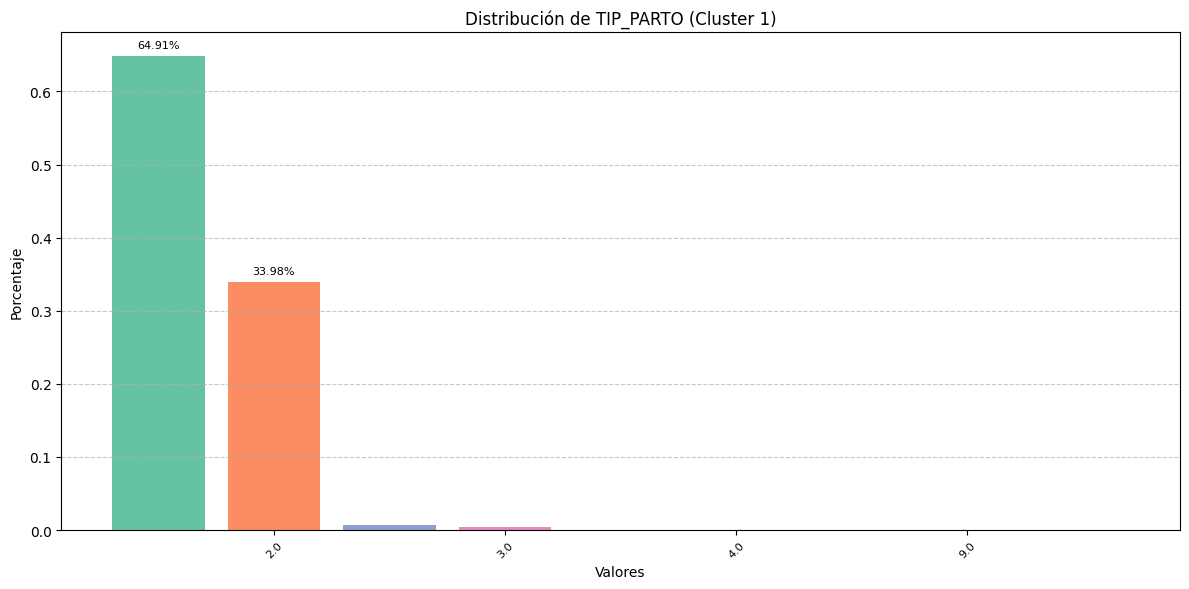

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


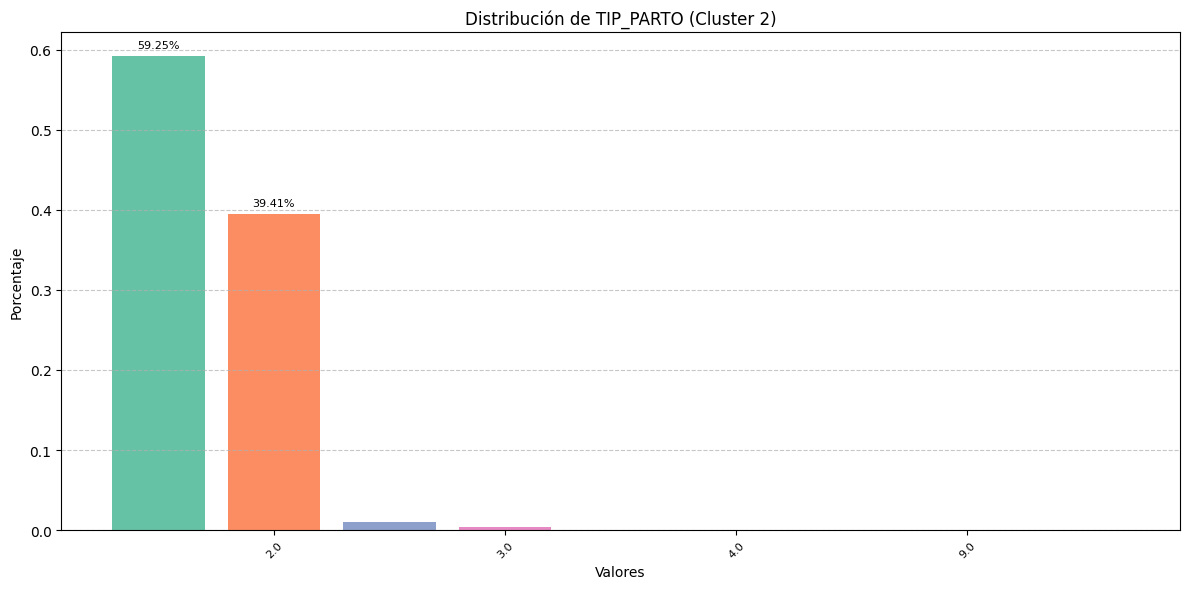

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


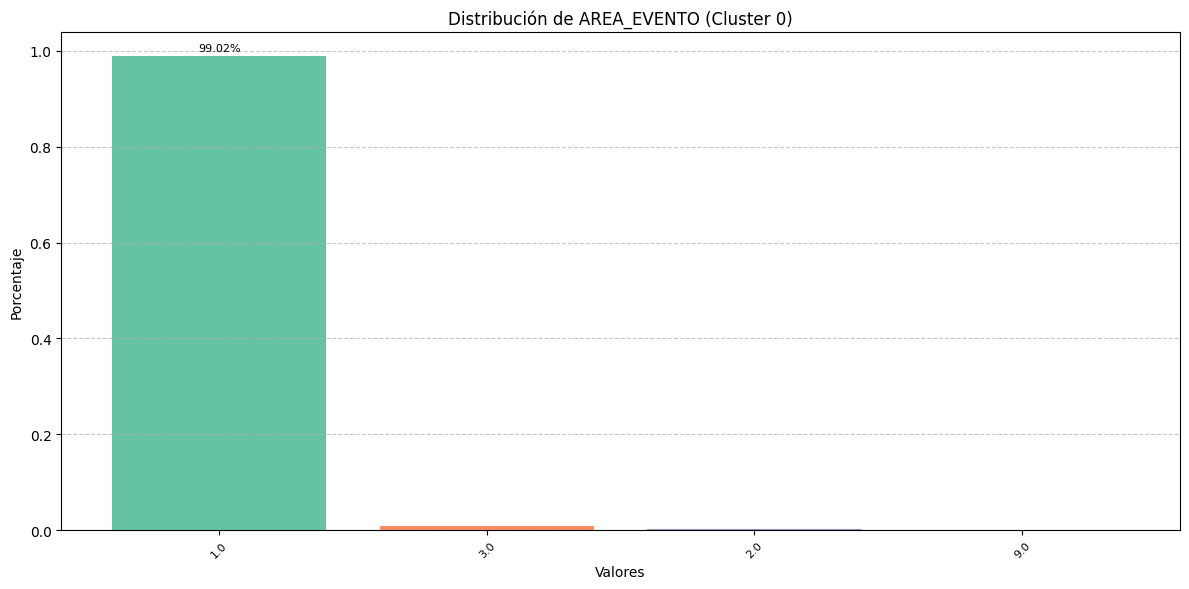

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


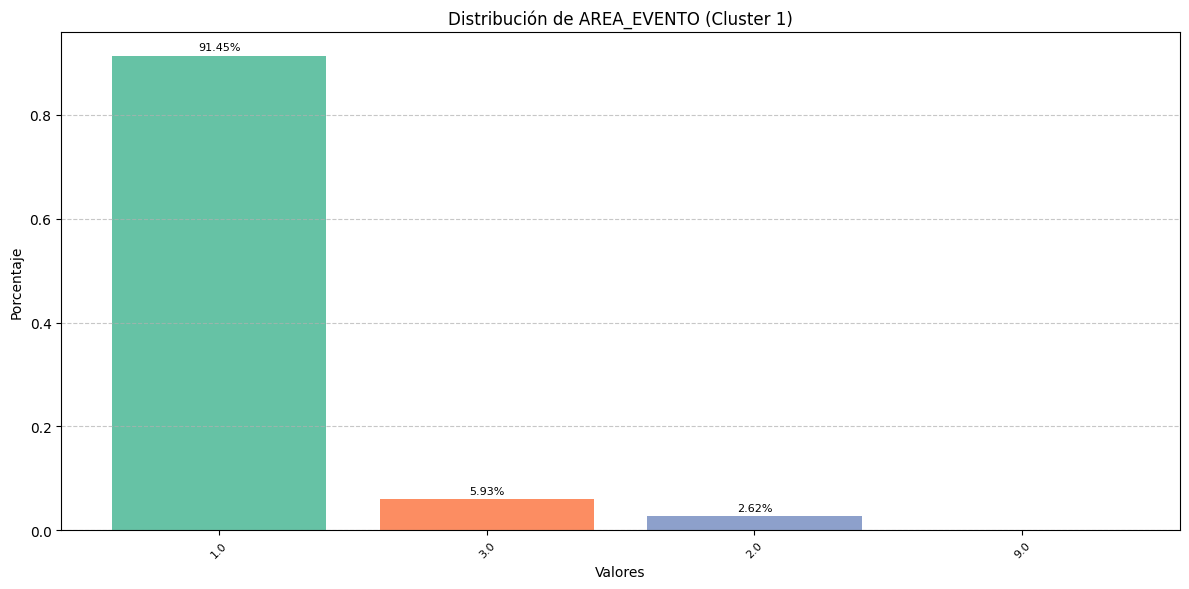

<ipython-input-131-da5666f276a5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


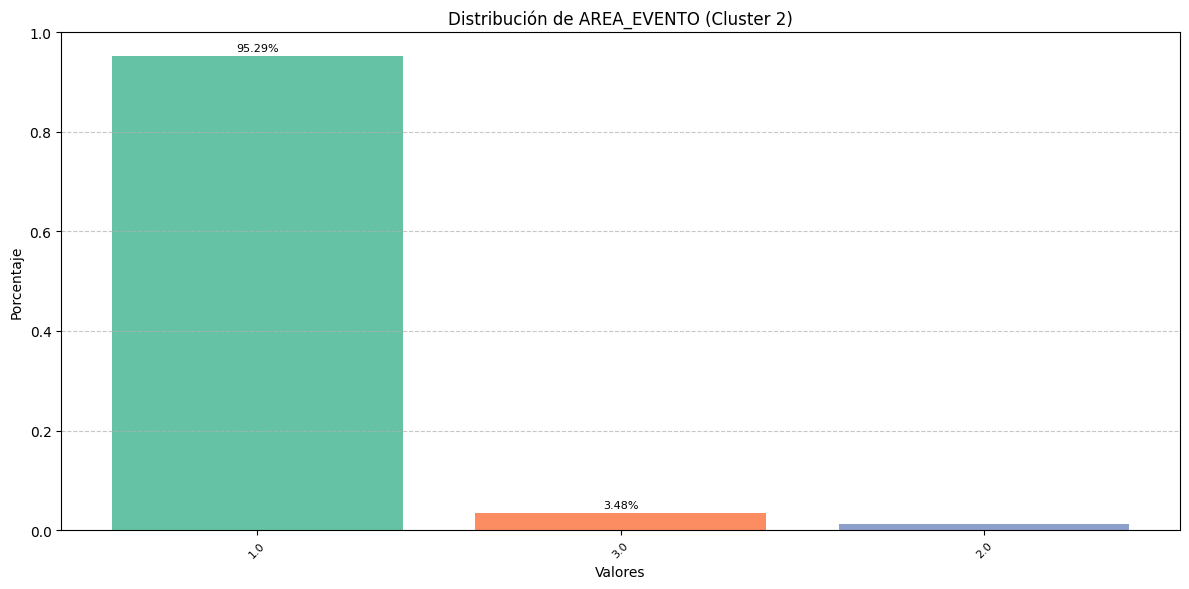

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Carga tus datos
data = data_para_modelos_machine

# Selecciona las características relevantes para el análisis
selected_features = [
    'ANO', 'MES', 'COD_MUNIC', 'SEG_SOCIAL', 'PESO_NAC', 'T_GES',
    'EDAD_MADRE', 'EST_CIVM', 'NIV_EDUM', 'ULTCURMAD', 'N_HIJOSV', 'VIVEOMUERE',
    'GRU_ED1', 'muerte por COVID-19', 'TIP_PARTO', 'AREA_EVENTO'
]

# Filtra y selecciona solo las características relevantes
data = data[selected_features]

# Manejo de datos faltantes (NaN)
data = data.dropna()

# Crea un modelo K-Means con k=3 (n_clusters=3)
cluster_labels = KMeans(n_clusters=3, random_state=0).fit_predict(data)

# Agrega las etiquetas de clúster al DataFrame original
data['Cluster'] = cluster_labels

# Función para crear gráficos de distribución con colores y porcentajes
def plot_distribution(data, feature, cluster):
    data_cluster = data[data['Cluster'] == cluster]
    values, counts = zip(*data_cluster[feature].value_counts(normalize=True).items())
    colors = sns.color_palette("Set2", len(values))

    fig, ax = plt.subplots(figsize=(12, 6))  # Aumentar el tamaño del gráfico
    ax.bar(values, counts, color=colors)
    ax.set_title(f'Distribución de {feature} (Cluster {cluster})')
    ax.set_xlabel("Valores")
    ax.set_ylabel("Porcentaje")
    ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Mostrar el porcentaje en cada barra (con mejor escalado)
    total = sum(counts)
    for value, count in zip(values, counts):
        if count * 100 / total > 2:  # Añadir porcentajes solo si son significativos
            ax.text(value, count + 0.01, f'{count*100/total:.2f}%', ha='center', fontsize=8)

    plt.tight_layout()
    plt.show()

# Crear un gráfico para mostrar cada distribución individualmente
for feature in selected_features:
    for cluster in range(3):
        plot_distribution(data, feature, cluster)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Carga tus datos
data = data_para_modelos_machine

# Selecciona las características relevantes para el análisis
selected_features = [
    'ANO', 'MES', 'COD_MUNIC', 'SEG_SOCIAL', 'PESO_NAC', 'T_GES',
    'EDAD_MADRE', 'EST_CIVM', 'NIV_EDUM', 'ULTCURMAD', 'N_HIJOSV', 'VIVEOMUERE',
    'GRU_ED1', 'muerte por COVID-19', 'TIP_PARTO', 'AREA_EVENTO'
]

# Filtra y selecciona solo las características relevantes
data = data[selected_features]

# Manejo de datos faltantes (NaN)
data = data.dropna()

# Crea un modelo K-Means con k=3 (n_clusters=3)
cluster_labels = KMeans(n_clusters=3, random_state=0).fit_predict(data)

# Agrega las etiquetas de clúster al DataFrame original
data['Cluster'] = cluster_labels

# Función para crear gráficos de distribución con colores y porcentajes
def plot_distribution(data, feature, cluster, pdf_pages):
    data_cluster = data[data['Cluster'] == cluster]
    values, counts = zip(*data_cluster[feature].value_counts(normalize=True).items())
    colors = sns.color_palette("Set2", len(values))

    fig, ax = plt.subplots(figsize=(12, 6))  # Aumentar el tamaño del gráfico
    ax.bar(values, counts, color=colors)
    ax.set_title(f'Distribución de {feature} (Cluster {cluster})')
    ax.set_xlabel("Valores")
    ax.set_ylabel("Porcentaje")
    ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Mostrar el porcentaje en cada barra (con mejor escalado)
    total = sum(counts)
    for value, count in zip(values, counts):
        if count * 100 / total > 2:  # Añadir porcentajes solo si son significativos
            ax.text(value, count + 0.01, f'{count*100/total:.2f}%', ha='center', fontsize=8)

    plt.tight_layout()
    pdf_pages.savefig(fig)
    plt.close()

# Crear un archivo PDF y guardar gráficas en él
with PdfPages('distribuciones_clusters.pdf') as pdf_pages:
    for feature in selected_features:
        for cluster in range(3):
            plot_distribution(data, feature, cluster, pdf_pages)

print("Gráficas exportadas a 'distribuciones_clusters.pdf'")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-36-9f161616cbe4>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente
<ipython-input-36-9f161616cbe4>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente
<ipython-input-36-9f161616cbe4>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente
<ipython-input-36-9f161616cbe4>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(va

Gráficas exportadas a 'distribuciones_clusters.pdf'


<ipython-input-36-9f161616cbe4>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation=45, fontsize=8)  # Rotar etiquetas y reducir tamaño de fuente


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carga tus datos
data = data_para_modelos_machine

# Selecciona las características relevantes para el análisis
# Puedes excluir ciertas columnas si no son relevantes para el PCA
selected_features = [
    'ANO', 'MES', 'COD_MUNIC', 'SEG_SOCIAL', 'PESO_NAC', 'T_GES',
    'EDAD_MADRE', 'EST_CIVM', 'NIV_EDUM', 'ULTCURMAD', 'N_HIJOSV', 'VIVEOMUERE',
    'GRU_ED1', 'muerte por COVID-19', 'TIP_PARTO', 'AREA_EVENTO'
]

# Filtra y selecciona solo las características relevantes
data = data[selected_features]

# Manejo de datos faltantes (NaN)
data = data.dropna()

# Separa la variable objetivo si la tienes
# Por ejemplo, si deseas realizar un PCA sin la variable objetivo
# target = data['muerte por COVID-19']
# data = data.drop('muerte por COVID-19', axis=1)

# Estandariza los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplica PCA
num_components = 2  # Número de componentes principales a mantener
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data_scaled)

# Configura el número de clústeres que deseas
n_clusters = 2  # Cambia esto según tu elección

# Crea una instancia de KMeans y ajusta los datos
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(data_scaled)

# Explora la varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por cada componente: {explained_variance}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Varianza explicada por cada componente: [0.17403811 0.16022196]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


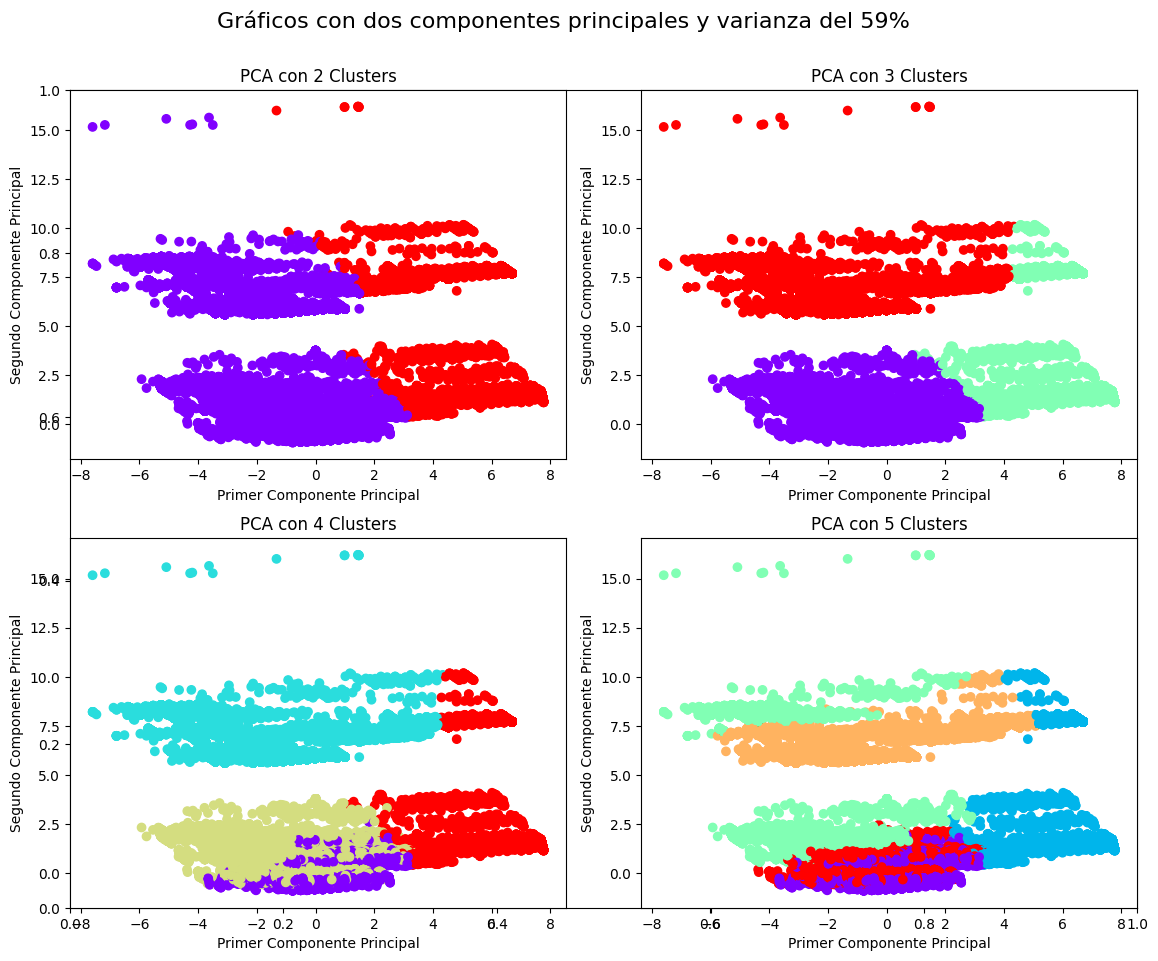

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carga tus datos
data = data_para_modelos_machine

# Selecciona las características relevantes para el análisis
selected_features = [
    'COD_MUNIC', 'PESO_NAC', 'T_GES',
    'NIV_EDUM', 'ULTCURMAD', 'VIVEOMUERE',
    'GRU_ED1', 'AREA_EVENTO', 'IDPERTET'
]

# Filtra y selecciona solo las características relevantes
data = data[selected_features]

# Manejo de datos faltantes (NaN)
data = data.dropna()

# Estandariza los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplica PCA
num_components = 2  # Número de componentes principales a mantener
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data_scaled)

# Números de clusters a probar
n_clusters = [2, 3, 4, 5]

# Crear un título general
fig, main_ax = plt.subplots(figsize=(12, 10))
fig.suptitle("Gráficos con dos componentes principales y varianza del 59%", fontsize=16)

# Crear subplots para diferentes números de clusters
sub_axes = [fig.add_subplot(2, 2, i + 1) for i in range(4)]

for i, n in enumerate(n_clusters):
    # Crea una instancia de KMeans y ajusta los datos
    kmeans = KMeans(n_clusters=n, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)

    # Plotea las dos componentes principales en el espacio 2D con colores de clusters
    sub_axes[i].scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='rainbow')
    sub_axes[i].set_title(f"PCA con {n} Clusters")
    sub_axes[i].set_xlabel('Primer Componente Principal')
    sub_axes[i].set_ylabel('Segundo Componente Principal')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Ajusta el espacio para el título general
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


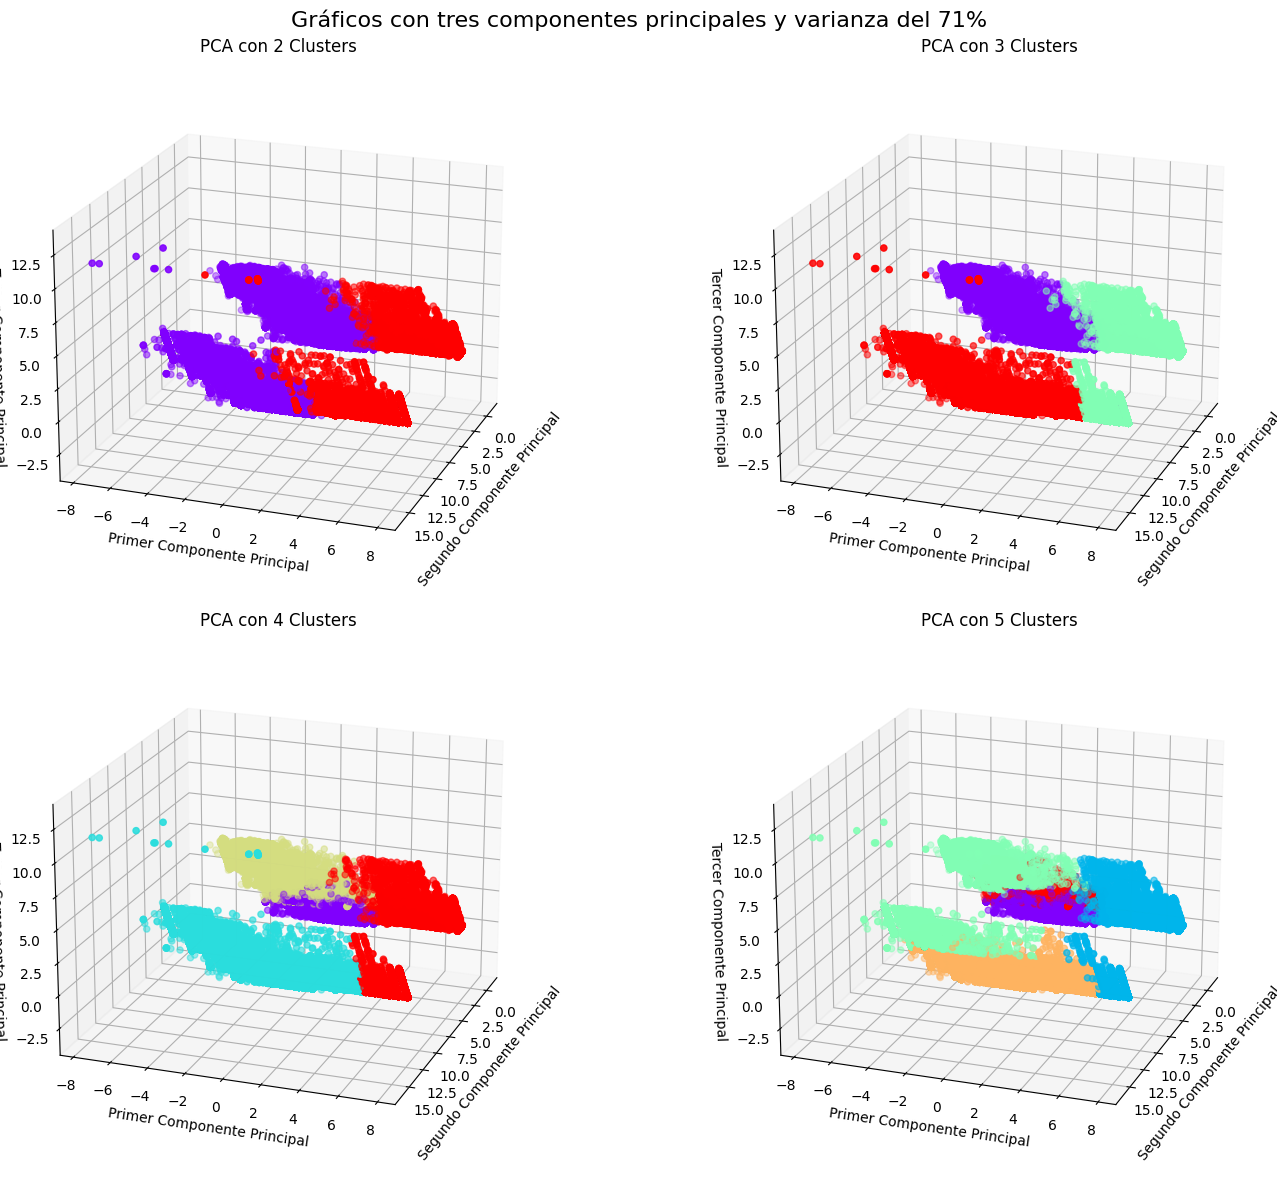

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importa Axes3D para gráficos 3D
from sklearn.cluster import KMeans

# Carga tus datos
data = data_para_modelos_machine

# Selecciona las características relevantes para el análisis
selected_features = [
    'COD_MUNIC', 'PESO_NAC', 'T_GES',
    'NIV_EDUM', 'ULTCURMAD', 'VIVEOMUERE',
    'GRU_ED1', 'AREA_EVENTO', 'IDPERTET'
]

# Filtra y selecciona solo las características relevantes
data = data[selected_features]

# Manejo de datos faltantes (NaN)
data = data.dropna()

# Estandariza los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplica PCA
num_components = 3  # Número de componentes principales a mantener
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data_scaled)

# Números de clusters a probar
n_clusters = [2, 3, 4, 5]

# Crear subplots para diferentes números de clusters
fig, axs = plt.subplots(2, 2, figsize=(16, 12), subplot_kw={'projection': '3d'})
axs = axs.ravel()

for i, n in enumerate(n_clusters):
    # Crea una instancia de KMeans y ajusta los datos
    kmeans = KMeans(n_clusters=n, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)

    # Plotea las tres componentes principales en el espacio 3D con colores de clusters
    scatter = axs[i].scatter(data_pca[:, 1], data_pca[:, 0], data_pca[:, 2], c=cluster_labels, cmap='rainbow')  # Cambia el orden de los ejes X y Y
    axs[i].set_title(f'PCA con {n} Clusters')

    # Configura el aspecto de los ejes
    axs[i].set_xlabel('Segundo Componente Principal', fontsize=10)  # Cambia el primer componente a ser el eje Y
    axs[i].set_ylabel('Primer Componente Principal', fontsize=10)  # Cambia el segundo componente a ser el eje X
    axs[i].set_zlabel('Tercer Componente Principal', fontsize=10)
    axs[i].view_init(elev=20, azim=20)  # Ajusta la vista para que los ejes sean más visibles

# Agrega un título común a los gráficos
fig.suptitle("Gráficos con tres componentes principales y varianza del 71%", fontsize=16)

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carga tus datos
data = data_para_modelos_machine

# Selecciona las características relevantes para el análisis
selected_features = [
    'ANO', 'MES', 'COD_MUNIC', 'SEG_SOCIAL', 'PESO_NAC', 'T_GES',
    'EDAD_MADRE', 'EST_CIVM', 'NIV_EDUM', 'ULTCURMAD', 'N_HIJOSV', 'VIVEOMUERE',
    'GRU_ED1', 'muerte por COVID-19', 'TIP_PARTO', 'AREA_EVENTO'
]

# Filtra y selecciona solo las características relevantes
data = data[selected_features]

# Manejo de datos faltantes (NaN)
data = data.dropna()

# Estandariza los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Realiza PCA con tres componentes principales
num_components = 3
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data_scaled)

# Crea un modelo K-Means con k=3 (n_clusters=3)
cluster_labels = KMeans(n_clusters=3, random_state=0).fit_predict(data_scaled)

# Agrega las etiquetas de clúster al DataFrame original
data['Cluster'] = cluster_labels

# Imprimir tablas de distribución de cada variable en cada clúster
for cluster in range(3):  # Cambia esto según el número de clústeres
    data_cluster = data[data['Cluster'] == cluster]
    print(f'Distribución de variables en Clúster {cluster}:\n')

    for feature in selected_features:
        feature_distribution = data_cluster[feature].value_counts(normalize=True) * 100  # Calcula los porcentajes
        print(f'Variable: {feature}\n')
        print(feature_distribution)
        print('\n------------------------------------\n')

    # Exportar tablas de distribución de cada variable en cada clúster a un archivo Excel
    with pd.ExcelWriter('distribucion_por_cluster.xlsx', mode='a', if_sheet_exists='replace') as writer:
        distribution_df = pd.DataFrame()
        distribution_df['Variable'] = selected_features
        distribution_df.set_index('Variable', inplace=True)

        for feature in selected_features:
            feature_distribution = data_cluster[feature].value_counts(normalize=True) * 100  # Calcula los porcentajes
            distribution_df.loc[feature, f'Cluster_{cluster}'] = feature_distribution.mean()

        distribution_df.to_excel(writer, sheet_name=f'Cluster_{cluster}', index=True)
        print(f"Tabla de distribución de Cluster {cluster} exportada a Excel.")

print("Tablas de distribución impresas en la pantalla y exportadas a 'distribucion_por_cluster.xlsx'")




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Distribución de variables en Clúster 0:

Variable: ANO

2020    51.459886
2021    48.540114
Name: ANO, dtype: float64

------------------------------------

Variable: MES

3     9.012014
1     8.986022
5     8.690002
2     8.630798
10    8.414197
6     8.294345
8     8.144169
4     8.056085
9     8.045977
7     8.035869
12    7.877029
11    7.813493
Name: MES, dtype: float64

------------------------------------

Variable: COD_MUNIC

1      73.248426
288     1.413678
551     1.392018
736     1.259169
615     1.225957
         ...    
549     0.001444
761     0.001444
302     0.001444
2       0.001444
545     0.001444
Name: COD_MUNIC, Length: 406, dtype: float64

------------------------------------

Variable: SEG_SOCIAL

2    48.343730
1    38.101427
5    11.811933
3     1.695258
9     0.025992
4     0.021660
Name: SEG_SOCIAL, dtype: float64

------------------------------------

Variable: PESO_NAC

1.0    71.130076
9.0    10.717380
2.0     4.433085
5.0     3.446832
3.0     3.415064
4.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carga tus datos
data = data_para_modelos_machine

# Selecciona las características relevantes para el análisis
selected_features = [
    'ANO', 'MES', 'COD_MUNIC', 'SEG_SOCIAL', 'PESO_NAC', 'T_GES',
    'EDAD_MADRE', 'EST_CIVM', 'NIV_EDUM', 'ULTCURMAD', 'N_HIJOSV', 'VIVEOMUERE',
    'GRU_ED1', 'muerte por COVID-19', 'TIP_PARTO', 'AREA_EVENTO', 'IDPERTET', 'IDADMINSALUD'
]

# Filtra y selecciona solo las características relevantes
data = data[selected_features]

# Manejo de datos faltantes (NaN)
data = data.dropna()

# Estandariza los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplica PCA
num_components = 2  # Número de componentes principales a mantener
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data_scaled)

# Explora la varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por cada componente: {explained_variance}')

# Calcula y analiza los loadings
loadings = pca.components_

# Ordena las variables en función de los valores absolutos de los loadings en el primer componente principal
abs_loadings = np.abs(loadings[0])  # Usamos el primer componente principal
sorted_indices = abs_loadings.argsort()[::-1]  # Ordenamos de mayor a menor

# Imprime los loadings de las variables ordenadas
print('Loadings de variables en el primer componente principal (de mayor a menor):')
for index in sorted_indices:
    variable = data.columns[index]
    loading = loadings[0][index]
    print(f'{variable}: {loading}')



Varianza explicada por cada componente: [0.17797475 0.14524685]
Loadings de variables en el primer componente principal (de mayor a menor):
VIVEOMUERE: 0.46343116691502856
GRU_ED1: -0.4623731030228076
IDPERTET: -0.40661148731651753
PESO_NAC: 0.3914731913942572
T_GES: 0.38593852993246497
AREA_EVENTO: 0.19843138463813959
NIV_EDUM: 0.11731754236340616
COD_MUNIC: 0.1172279669241999
ULTCURMAD: 0.11441537387356461
muerte por COVID-19: 0.09919116686744406
TIP_PARTO: -0.07409821379880574
EDAD_MADRE: 0.06504255112393528
SEG_SOCIAL: 0.04292043158348121
N_HIJOSV: 0.0340106801489455
IDADMINSALUD: 0.030368226701099656
EST_CIVM: 0.018861928615202014
MES: 0.009867513914356411
ANO: -0.0020093205369772216


Modelos supervisados

In [ ]:
X = data_para_modelos_machine[['ANO', 'MES', 'COD_MUNIC', 'COD_DPTO', 'SEXO', 'EDAD_MADRE', 'SEG_SOCIAL', 'AREA_EVENTO', 'EST_CIVM', 'N_HIJOSV', 'NIV_EDUM', 'PESO_NAC']]
y = data_para_modelos_machine['VIVEOMUERE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Crea una instancia del RandomForestClassifier con los parámetros deseados
model_rf = RandomForestClassifier(
    bootstrap=True,
    min_samples_leaf=4,
    n_estimators=60,
    min_samples_split=10,
    max_features='sqrt',
    max_depth=6,
    max_leaf_nodes=None,
    class_weight='balanced',
    random_state=123
)
# Entrena el modelo con los datos de entrenamiento
model_rf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Calcula diferentes métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Imprime las métricas
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest F1-score: {f1_rf:.2f}')
print(f'Random Forest Precision: {precision_rf:.2f}')
print(f'Random Forest Recall: {recall_rf:.2f}')
print(f'Random Forest ROC AUC: {roc_auc_rf:.2f}')

Random Forest Accuracy: 0.97
Random Forest F1-score: 0.98
Random Forest Precision: 0.99
Random Forest Recall: 0.97
Random Forest ROC AUC: 0.94


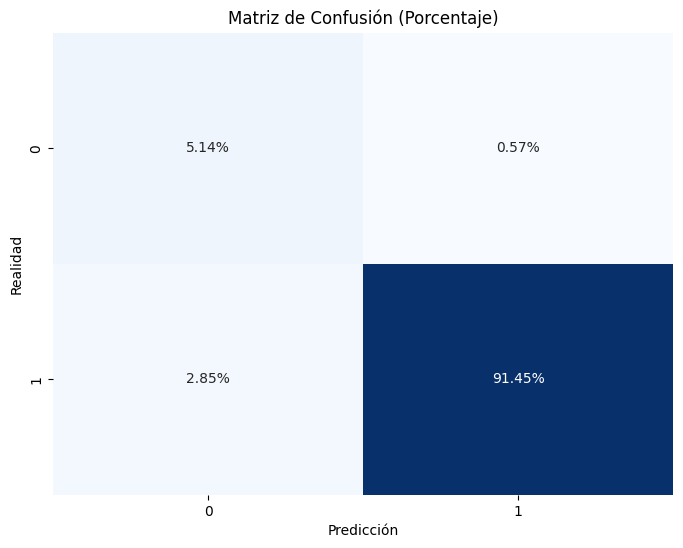

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crea una instancia del RandomForestClassifier con los parámetros deseados
model_rf = RandomForestClassifier(
    bootstrap=True,
    min_samples_leaf=4,
    n_estimators=60,
    min_samples_split=10,
    max_features='sqrt',
    max_depth=6,
    max_leaf_nodes=None,
    class_weight='balanced',
    random_state=123
)

# Entrena el modelo con los datos de entrenamiento
model_rf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Calcula la matriz de confusión
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Calcula los porcentajes en la matriz de confusión
total_samples = len(y_test)
confusion_rf_percentage = confusion_rf / total_samples

# Configura el estilo de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf_percentage, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión (Porcentaje)")
plt.show()




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Crea una instancia de LogisticRegression con los parámetros deseados
model_lr = LogisticRegression(
    penalty='l2',          # Regularización tipo L2
    C=1,                  # Valor C para la fuerza de la regularización
)

# Realiza validación cruzada estratificada con 10 folds
cv = StratifiedKFold(n_splits=10)

# Calcula métricas de evaluación a través de la validación cruzada
accuracy_scores = cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='f1')
precision_scores = cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='precision')
recall_scores = cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='recall')
roc_auc_scores = cross_val_score(model_lr, X_train, y_train, cv=cv, scoring='roc_auc')

# Entrena el modelo final con los datos de entrenamiento
model_lr.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_lr = model_lr.predict(X_test)

# Calcula métricas de evaluación en el conjunto de prueba
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

# Imprime las métricas de la validación cruzada y del conjunto de prueba
print(f'Logistic Regression Cross-Validation Accuracy: {accuracy_scores.mean():.2f}')
print(f'Logistic Regression Cross-Validation F1-score: {f1_scores.mean():.2f}')
print(f'Logistic Regression Cross-Validation Precision: {precision_scores.mean():.2f}')
print(f'Logistic Regression Cross-Validation Recall: {recall_scores.mean():.2f}')
print(f'Logistic Regression Cross-Validation ROC AUC: {roc_auc_scores.mean():.2f}')

print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print(f'Logistic Regression F1-score: {f1_lr:.2f}')
print(f'Logistic Regression Precision: {precision_lr:.2f}')
print(f'Logistic Regression Recall: {recall_lr:.2f}')
print(f'Logistic Regression ROC AUC: {roc_auc_lr:.2f}')



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Accuracy: 0.98
Logistic Regression Cross-Validation F1-score: 0.99
Logistic Regression Cross-Validation Precision: 0.98
Logistic Regression Cross-Validation Recall: 1.00
Logistic Regression Cross-Validation ROC AUC: 0.84
Logistic Regression Accuracy: 0.98
Logistic Regression F1-score: 0.99
Logistic Regression Precision: 0.98
Logistic Regression Recall: 1.00
Logistic Regression ROC AUC: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


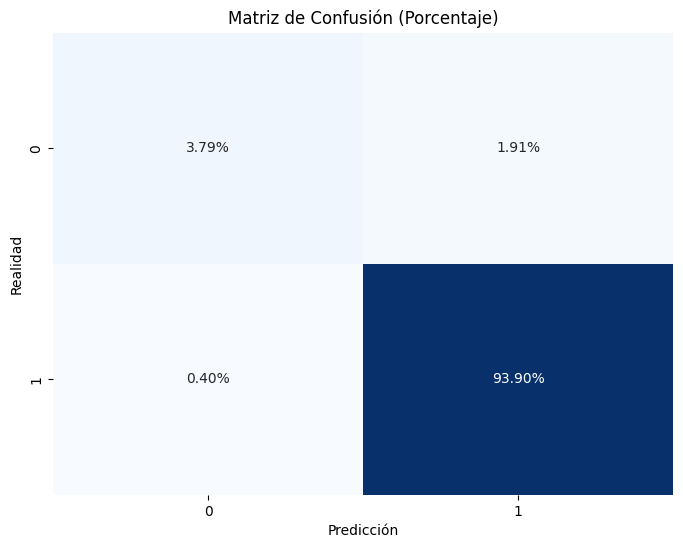

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Crea una instancia de LogisticRegression con los parámetros deseados
model_lr = LogisticRegression(
    penalty='l2',          # Regularización tipo L2
    C=1,                  # Valor C para la fuerza de la regularización
)

# Entrena el modelo con los datos de entrenamiento
model_lr.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_lr = model_lr.predict(X_test)

# Calcula la matriz de confusión
confusion_lr = confusion_matrix(y_test, y_pred_lr)

# Calcula los porcentajes en la matriz de confusión
total_samples = len(y_test)
confusion_lr_percentage = confusion_lr / total_samples

# Configura el estilo de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_lr_percentage, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión (Porcentaje)")
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Crea una instancia de KNeighborsClassifier con los parámetros deseados
model_knn = KNeighborsClassifier(
    n_neighbors=5,  # Número de vecinos
    metric='euclidean',  # Métrica Euclidiana
    weights='uniform',  # Función de peso uniforme
)

# Entrena el modelo con los datos de entrenamiento
model_knn.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_knn = model_knn.predict(X_test)

# Calcula diferentes métricas de evaluación
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

# Imprime las métricas
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}')
print(f'K-Nearest Neighbors F1-score: {f1_knn:.2f}')
print(f'K-Nearest Neighbors Precision: {precision_knn:.2f}')
print(f'K-Nearest Neighbors Recall: {recall_knn:.2f}')
print(f'K-Nearest Neighbors ROC AUC: {roc_auc_knn:.2f}')


K-Nearest Neighbors Accuracy: 0.98
K-Nearest Neighbors F1-score: 0.99
K-Nearest Neighbors Precision: 0.98
K-Nearest Neighbors Recall: 1.00
K-Nearest Neighbors ROC AUC: 0.87


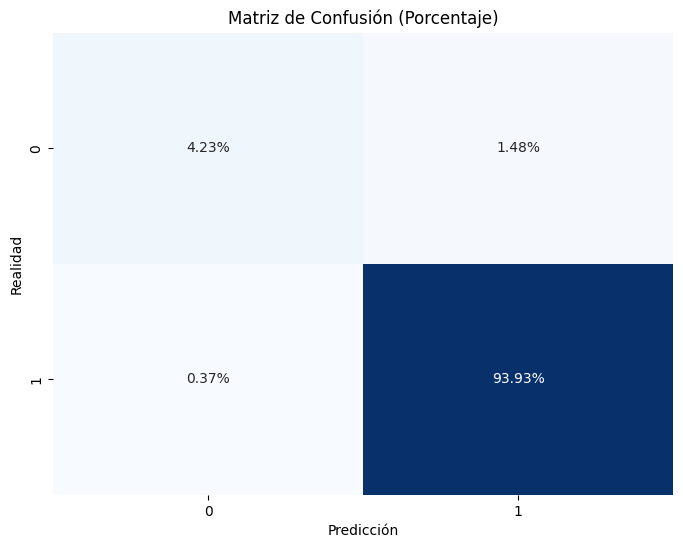

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crea una instancia de KNeighborsClassifier con los parámetros deseados
model_knn = KNeighborsClassifier(
    n_neighbors=5,  # Número de vecinos
    metric='euclidean',  # Métrica Euclidiana
    weights='uniform',  # Función de peso uniforme
)

# Entrena el modelo con los datos de entrenamiento
model_knn.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_knn = model_knn.predict(X_test)

# Calcula la matriz de confusión
confusion_knn = confusion_matrix(y_test, y_pred_knn)

# Calcula los porcentajes en la matriz de confusión
total_samples = len(y_test)
confusion_knn_percentage = confusion_knn / total_samples

# Configura el estilo de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn_percentage, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión (Porcentaje)")
plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Crea una instancia de AdaBoostClassifier con los parámetros deseados
model_adaboost = AdaBoostClassifier(
    n_estimators=50,      # Número de estimadores
    learning_rate=1.0,   # Tasa de aprendizaje
    algorithm='SAMME.R', # Algoritmo de clasificación
)

# Entrena el modelo con los datos de entrenamiento
model_adaboost.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_adaboost = model_adaboost.predict(X_test)

# Calcula diferentes métricas de evaluación
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
roc_auc_adaboost = roc_auc_score(y_test, y_pred_adaboost)

# Imprime las métricas
print(f'AdaBoost Accuracy: {accuracy_adaboost:.2f}')
print(f'AdaBoost F1-score: {f1_adaboost:.2f}')
print(f'AdaBoost Precision: {precision_adaboost:.2f}')
print(f'AdaBoost Recall: {recall_adaboost:.2f}')
print(f'AdaBoost ROC AUC: {roc_auc_adaboost:.2f}')


AdaBoost Accuracy: 0.99
AdaBoost F1-score: 0.99
AdaBoost Precision: 0.99
AdaBoost Recall: 1.00
AdaBoost ROC AUC: 0.90


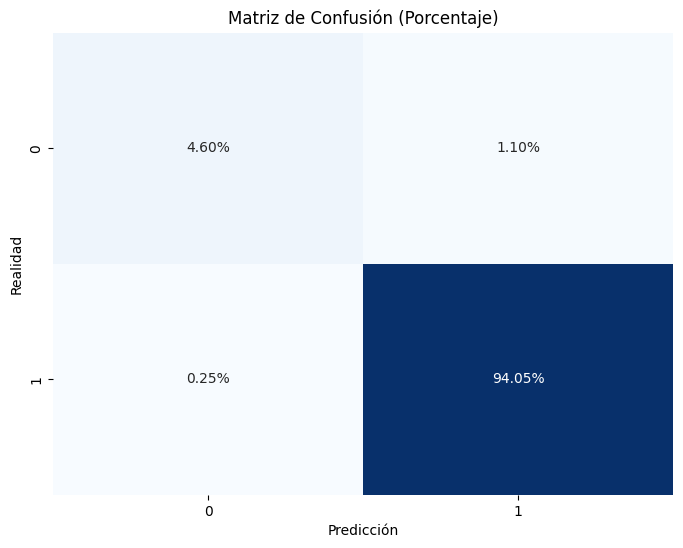

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crea una instancia de AdaBoostClassifier con los parámetros deseados
model_adaboost = AdaBoostClassifier(
    n_estimators=50,      # Número de estimadores
    learning_rate=1.0,   # Tasa de aprendizaje
    algorithm='SAMME.R', # Algoritmo de clasificación
)

# Entrena el modelo con los datos de entrenamiento
model_adaboost.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_adaboost = model_adaboost.predict(X_test)

# Calcula la matriz de confusión
confusion_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Calcula los porcentajes en la matriz de confusión
total_samples = len(y_test)
confusion_adaboost_percentage = confusion_adaboost / total_samples

# Configura el estilo de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_adaboost_percentage, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión (Porcentaje)")
plt.show()
